# <span style="color: green; font-size: 40px; font-weight: bold;"> Projeto (Regressão com PySpark) </span>

<br> <br>

# Prevendo a Cotação de Criptomoedas em Tempo Real com PySpark e Machine Learning

<br>

### Contexto

Neste mini-projeto, vamos explorar um importante contexto de negócio na área de finanças: a **previsão da cotação de criptomoedas**. O projeto será desenvolvido desde a concepção do problema de negócio até a entrega de um modelo preditivo, utilizando ferramentas comuns de análise de dados no dia a dia de um Cientista de Dados. Apesar do foco ser em ferramentas de análise de dados, o projeto não serve como aconselhamento financeiro.

<br>

### Objetivo

O objetivo deste mini-projeto é **construir um modelo de Machine Learning capaz de prever a cotação de criptomoedas**. Usaremos dados históricos do Bitcoin para treinar o modelo. O Bitcoin, lançado em 2009 pelo anônimo Satoshi Nakamoto, é a criptomoeda mais antiga e conhecida. Servindo como meio descentralizado de troca digital, as transações de Bitcoin são verificadas e registradas em um livro público distribuído chamado Blockchain. O modelo deve ser capaz de prever a cotação do Bitcoin em tempo real a partir de novos dados de entrada. Este projeto pode ser estendido para outras criptomoedas ou instrumentos financeiros com dados de cotação disponíveis.

<br>

### Pergunta de Negócio Principal

> "Como podemos prever a cotação futura do Bitcoin usando dados históricos?"

<br>

### Entregável

O entregável deste mini-projeto será um **modelo de Machine Learning treinado para prever a cotação do Bitcoin**. O modelo será desenvolvido utilizando dados históricos de cotação do Bitcoin e será capaz de fazer previsões em tempo real com base em novos dados de entrada. O processo incluirá a concepção do problema de negócio, preparação dos dados, desenvolvimento do modelo, e a entrega do modelo preditivo.

<br>

### Sobre o Conjunto de Dados

Os dados utilizados neste mini-projeto abrangem o período de 2011 a 2021. O arquivo CSV contém registros OHLC (Open, High, Low, Close) da cotação do Bitcoin, Volume em BTC e Volume na moeda (dólar).

A última coluna indica o preço ponderado do Bitcoin. Os carimbos de data/hora (timestamp) estão em hora Unix. Timestamps sem atividade têm seus campos de dados preenchidos com NaNs. Se estiver faltando um carimbo de data/hora ou houver saltos, isso pode ser devido à inatividade da Exchange, inexistência da Exchange, ou outros erros técnicos na coleta dos dados.

Optamos por não usar dados do ano de 2022 devido à sua natureza atípica, mas você pode incluir esses dados e treinar novamente o modelo se desejar.

<br>

Para este projeto, utilizaremos o conjunto de dados "Bitcoin Historical Data", que contém quase 5 milhões de linhas e informações detalhadas sobre as transações de Bitcoin ao longo do tempo. O conjunto de dados inclui dados sobre preços de abertura, fechamento, máximo e mínimo, volume de Bitcoins negociados, volume em moeda fiduciária e preço ponderado. Além disso, uma coluna adicional dateTime foi criada para converter os timestamps Unix em um formato de data e hora legível.

<br>

<table border="2">
  <tr>
    <th style="text-align: center; font-size: 16px;">Nome da Coluna</th>
    <th style="text-align: center; font-size: 16px;">Tipo de Dado</th>
    <th style="text-align: center; font-size: 16px;">Descrição</th>
  </tr>
  <tr>
    <td>Timestamp</td>
    <td>integer</td>
    <td>Representa o Unix timestamp, que é o número de segundos desde 1 de janeiro de 1970 (UTC).</td>
  </tr>
  <tr>
    <td>Open</td>
    <td>double</td>
    <td>Preço de abertura do Bitcoin no início do período de tempo.</td>
  </tr>
  <tr>
    <td>High</td>
    <td>double</td>
    <td>Preço mais alto do Bitcoin durante o período de tempo.</td>
  </tr>
  <tr>
    <td>Low</td>
    <td>double</td>
    <td>Preço mais baixo do Bitcoin durante o período de tempo.</td>
  </tr>
  <tr>
    <td>Close</td>
    <td>double</td>
    <td>Preço de fechamento do Bitcoin no final do período de tempo.</td>
  </tr>
  <tr>
    <td>Volume_(BTC)</td>
    <td>double</td>
    <td>Volume total de Bitcoins negociados durante o período de tempo.</td>
  </tr>
  <tr>
    <td>Volume_(Currency)</td>
    <td>double</td>
    <td>Volume total em moeda fiduciária (por exemplo, USD) das transações de Bitcoin durante o período.</td>
  </tr>
  <tr>
      <td>Weighted_Price <b>(variável alvo)</b></td>
    <td>double</td>
    <td>Preço ponderado do Bitcoin, calculado com base nos preços e volumes das transações durante o período.</td>
  </tr>
  <tr>
    <td>dateTime</td>
    <td>string</td>
    <td>Irá representar a data e hora no formato legível, será criada a partir do Unix timestamp. <b>(Nova Coluna)</b> </td>
  </tr>
</table>


<br> <br> <br>

# Importando Pacotes

In [72]:
### Imports

# Importa o findspark e inicializa
import findspark
findspark.init()

## Bibliotecas de Manipulação e Análise de Dados

import pandas as pd                      # Biblioteca para manipulação e análise de dados tabulares.
import numpy as np                       # Biblioteca para cálculos numéricos e manipulação de arrays.


## Bibliotecas de Visualização de Dados

import seaborn as sns                    # Biblioteca para visualização de dados estatísticos.
from matplotlib import pyplot as plt     # Biblioteca para criação de gráficos e visualizações.


## Bibliotecas Principais do PySpark

import pyspark                           # Biblioteca para processamento de dados em grande escala usando clusters.
from pyspark import SparkConf            # Configuração e criação do contexto do Spark.
from pyspark import SparkContext         # Configuração e criação do contexto do Spark.   
from pyspark.sql import SparkSession     # Criação e manipulação de sessões e contextos SQL no Spark.
from pyspark.sql import SQLContext       # Criação e manipulação de sessões e contextos SQL no Spark.
from pyspark.sql.types import *          # Tipos de dados usados na criação de schemas de DataFrames no Spark.
from pyspark.sql.functions import *      # Funções SQL usadas para manipulação e transformação de dados no Spark.
from pyspark.sql.functions import col, count, when, isnan
from pyspark.sql.functions import from_unixtime, col, expr, date_format, from_utc_timestamp

## Bibliotecas de Machine Learning no PySpark

from pyspark.ml.linalg import Vectors         # Estruturas de dados para manipulação de vetores na MLlib do Spark.
from pyspark.ml.feature import StringIndexer  # Transformação de variáveis categóricas em numéricas.
from pyspark.ml.regression import LinearRegression      # Algoritmo de regressão linear na MLlib do Spark.
from pyspark.mllib.evaluation import RegressionMetrics  # Métricas de avaliação para modelos de regressão.
from pyspark.ml.stat import Correlation                 # Cálculo de correlações entre colunas de DataFrames.
from pyspark.ml.feature import MinMaxScaler             # Normalização dos dados para um intervalo específico.
from pyspark.ml.feature import VectorAssembler   # Combinação de múltiplas colunas em uma única coluna de vetores.
from pyspark.ml import Pipeline          # Construção de pipelines de ML que consistem em uma sequência de etapas.
from pyspark.ml.tuning import ParamGridBuilder    # Ferramentas para construção de grids de parâmetros.
from pyspark.ml.tuning import CrossValidator      # Ferramentas para construção de validação cruzada.
from pyspark.ml.tuning import CrossValidatorModel # Ferramentas para construção de validação cruzada.
from pyspark.ml.feature import StandardScaler     # Normalização de dados para ter média zero e variância unitária.
from pyspark.ml.evaluation import RegressionEvaluator  # Avaliação de modelos de regressão utilizando 
                                                       # métricas como RMSE e R2.
    
from pyspark.ml import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import joblib
from pyspark.ml import PipelineModel
from pyspark.ml.regression import LinearRegressionModel

from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.regression import GBTRegressor
import zipfile

In [2]:
## Formatação das saídas

# Configura o Pandas para mostrar até 200 colunas ao exibir um DataFrame
pd.set_option('display.max_columns', 200)

# Configura o Pandas para mostrar até 400 caracteres por coluna ao exibir um DataFrame
pd.set_option('display.max_colwidth', 400)

# Configuramos matplotlib_axes_logger para exibir apenas mensagens de erro 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pyspark   : 3.5.1
decimal   : 1.70
pandas    : 1.3.5
joblib    : 1.4.2
numpy     : 1.22.4
findspark : 2.0.1
sys       : 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
seaborn   : 0.11.2
matplotlib: 3.4.3



<br>

## Por que vamos usar o <i>PySpark</i> ao invés de utilizarmos somente <i>Linguagem Python</i>?

> Antes de responder, podemos afirmar que SIM, este projeto poderia ser feito usando somente <i>Linguagem Python</i>.

#### Então por que usar o PyStark?

Como iremos ver a seguir, nosso conjunto de dados possui um tamanho de **317MB** e **quase 5 milhões de linhas**. Será que conseguiríamos processar esse volume de dados tão alto com Linguagem Python? Provavelmente não!

<br>

Portanto usaremos o **PySpark** pois o ele nos permite trabalhar em um ambiente distribuído. 

<br> <br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Preparando o Ambiente Spark</span>

In [4]:
# Definindo semente aleatória (seed) para reprodutibilidade do notebook
rnd_seed = 23
np.random.seed = rnd_seed
np.random.set_state = rnd_seed

# Criando o Spark Context
conf = SparkConf().setAppName("Mini-Projeto3") \
                  .set("spark.ui.showConsoleProgress", "false") \
                  .set("spark.executor.heartbeatInterval", "20s") \
                  .set("spark.eventLog.enabled", "false") \
                  .set("spark.sql.shuffle.partitions", "2") \
                  .set("spark.sql.debug.maxToStringFields", "100") \
                  .set("spark.executor.memory", "4g") \
                  .set("spark.driver.memory", "4g") \
                  .set("spark.driver.maxResultSize", "2g")  # Configuração adicional para limitar o tamanho do resultado

# Criar o Spark Context e a Spark Session
sc = SparkContext(conf=conf)
spark_session = SparkSession.builder.config(conf=conf).getOrCreate()

# Ajustar o nível de log para ERROR
sc.setLogLevel("ERROR")

# Configurar log4j para suprimir avisos (deixar como comentário e volta ao normal)
log4j_logger = sc._jvm.org.apache.log4j
log4j_logger.LogManager.getLogger("org").setLevel(log4j_logger.Level.ERROR)
log4j_logger.LogManager.getLogger("akka").setLevel(log4j_logger.Level.ERROR)

# Visualizar o objeto spark_session
spark_session

24/07/19 12:58:18 WARN Utils: Your hostname, eduardo-Inspiron-15-3520 resolves to a loopback address: 127.0.1.1; using 192.168.0.13 instead (on interface wlp0s20f3)
24/07/19 12:58:18 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/19 12:58:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Carregando os Dados</span>

In [128]:
# Carrega os dados a partir da sessão Spark
df_spark = spark_session.read.csv('dados/dataset.csv', header = 'true', inferSchema = 'true')

AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/home/eduardo/Desktop/DataScience/CienciaDeDados/2.Big-Data-Real-Time-Analytics-com-Python-e-Spark/11.Processamento_de_Dados_com_Apache_Spark/dados/dataset.csv.

In [6]:
# Tipo do objeto
type(df_spark)

pyspark.sql.dataframe.DataFrame

In [127]:
# Visualiza as 5 primeiras linhas dos dados
df_spark.show(5)

24/07/21 10:39:23 ERROR Executor: Exception in task 0.0 in stage 59451.0 (TID 706139)
org.apache.spark.SparkFileNotFoundException: File file:/home/eduardo/Desktop/DataScience/CienciaDeDados/2.Big-Data-Real-Time-Analytics-com-Python-e-Spark/11.Processamento_de_Dados_com_Apache_Spark/dados/dataset.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:780)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:

Py4JJavaError: An error occurred while calling o65.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 59451.0 failed 1 times, most recent failure: Lost task 0.0 in stage 59451.0 (TID 706139) (192.168.0.13 executor driver): org.apache.spark.SparkFileNotFoundException: File file:/home/eduardo/Desktop/DataScience/CienciaDeDados/2.Big-Data-Real-Time-Analytics-com-Python-e-Spark/11.Processamento_de_Dados_com_Apache_Spark/dados/dataset.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:780)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at jdk.internal.reflect.GeneratedMethodAccessor317.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkFileNotFoundException: File file:/home/eduardo/Desktop/DataScience/CienciaDeDados/2.Big-Data-Real-Time-Analytics-com-Python-e-Spark/11.Processamento_de_Dados_com_Apache_Spark/dados/dataset.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:780)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [8]:
# Visualiza os metadados (schema) - similar ao info()
df_spark.printSchema()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume_(BTC): double (nullable = true)
 |-- Volume_(Currency): double (nullable = true)
 |-- Weighted_Price: double (nullable = true)



In [9]:
# Converte o DataFrame do Spark para um DataFrame do Pandas (apenas se quiser)
#df_pandas = df_spark.toPandas()

# Visualiza os dados usando display()
#display(df_pandas.head(5))

<br>

## Renomeando Colunas

In [10]:
# Vamos renomear algumas colunas para facilitar a manipulação dos dados
df_spark = df_spark.withColumnRenamed("Volume_(BTC)", "VolBTC").withColumnRenamed("Volume_(Currency)", "VolCurrency")

<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;"> Análise Exploratória Inicial dos Dados </span>

<br>

### Função Para Análise Inicial

In [11]:
def analise_inicial(df):
    # Exibir o schema do DataFrame
    print('\n\n INFO (schema)\n\n')
    df.printSchema()
    
    print('\n\n ------------------------------------------------------------------------------------------ \n\n')
    
    # Número de linhas
    print("Número de Linhas:", df.count())

    # Verificar valores ausentes em cada coluna
    print('\n\n TOTAL DE VALORES NaN por Coluna \n')
    valores_ausentes = df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns])
    valores_ausentes.show()

    # Verificar se existe alguma variável com valores ausentes
    valores_ausentes_boolean = any(row[c] > 0 for row in valores_ausentes.collect() for c in df.columns)

    # Nomes das variáveis com valores ausentes
    variaveis_ausentes = [c for c in df.columns if df.filter(col(c).isNull() | isnan(c)).count() > 0]

    # Número de linhas duplicadas
    num_linhas_total = df.count()
    num_linhas_distintas = df.distinct().count()
    num_linhas_duplicadas = num_linhas_total - num_linhas_distintas

    # Porcentagem de linhas duplicadas
    porcentagem_linhas_duplicadas = (num_linhas_duplicadas / num_linhas_total) * 100

    # Total de linhas com pelo menos um valor ausente
    total_linhas_ausentes = df.filter(
        " OR ".join([f"(`{c}` IS NULL OR isnan(`{c}`))" for c in df.columns])
    ).count()

    # Porcentagem de linhas com pelo menos um valor ausente
    porcentagem_linhas_ausentes = (total_linhas_ausentes / num_linhas_total) * 100

    # Exibe o resultado
    print("\n\nExistem valores ausentes:", valores_ausentes_boolean)
    
    if valores_ausentes_boolean:
        print("\nVariáveis com valores ausentes:", variaveis_ausentes)
        print("\nTotal de Linhas com Valores Ausentes:", total_linhas_ausentes)
        print("\nPorcentagem de Linhas Com Valor Ausente: {:.2f}%".format(porcentagem_linhas_ausentes))
    else:
        print("\nNenhuma variável possui valores ausentes.")

    print("\n\n\nExistem valores duplicados:", num_linhas_duplicadas > 0)
    
    if num_linhas_duplicadas > 0:
        print("\nNúmero de Linhas Duplicadas:", num_linhas_duplicadas)
        print("\nPorcentagem de Linhas Duplicadas: {:.2f}%\n".format(porcentagem_linhas_duplicadas))
    else:
        print("\nNenhuma variável possui valores duplicados.\n")

# Exemplo de uso da função com o DataFrame df_spark
analise_inicial(df_spark)



 INFO (schema)


root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- VolBTC: double (nullable = true)
 |-- VolCurrency: double (nullable = true)
 |-- Weighted_Price: double (nullable = true)



 ------------------------------------------------------------------------------------------ 


Número de Linhas: 4856600


 TOTAL DE VALORES NaN por Coluna 

+---------+-------+-------+-------+-------+-------+-----------+--------------+
|Timestamp|   Open|   High|    Low|  Close| VolBTC|VolCurrency|Weighted_Price|
+---------+-------+-------+-------+-------+-------+-----------+--------------+
|        0|1242831|1242831|1242831|1242831|1242831|    1242831|       1242831|
+---------+-------+-------+-------+-------+-------+-----------+--------------+



Existem valores ausentes: True

Variáveis com valores ausentes: ['Open', 'High', 'Low', 'Close', 'VolBTC

<br><br>

# Visualizando os Tipos dos Dados Separadamente

<br>

#### Visualizando Variáveis Categóricas e Numéricas

- Todas as variáveis são numéricas neste dataframe
- Dados com problemas evidentes como valores NaN e colunas como 'Timestamp' representando data.

<br><br>

## Analisando Todas as Variáveis

#### Resumo Estatístico

In [12]:
# Visualizar o resumo estatístico do DataFrame
df_spark.describe().show()

+-------+-------------------+-------+-------+-------+-------+-------+-----------+--------------+
|summary|          Timestamp|   Open|   High|    Low|  Close| VolBTC|VolCurrency|Weighted_Price|
+-------+-------------------+-------+-------+-------+-------+-------+-----------+--------------+
|  count|            4856600|4856600|4856600|4856600|4856600|4856600|    4856600|       4856600|
|   mean|1.471324115749862E9|    NaN|    NaN|    NaN|    NaN|    NaN|        NaN|           NaN|
| stddev|8.426671569710898E7|    NaN|    NaN|    NaN|    NaN|    NaN|        NaN|           NaN|
|    min|         1325317920|    3.8|    3.8|    1.5|    1.5|    0.0|        0.0|           3.8|
|    max|         1617148800|    NaN|    NaN|    NaN|    NaN|    NaN|        NaN|           NaN|
+-------+-------------------+-------+-------+-------+-------+-------+-----------+--------------+



<br> <br> <br>
# <span style="color: green; font-size: 38px; font-weight: bold;"> Criando Tabela Temporária </span>

- As tabelas temporárias são úteis quando você deseja que o conjunto de resultados fique visível para todas as outras sessões Spark

In [13]:
# Cria uma tabela temporária a partir do dataframe (se não existir, ele cria)
df_spark.createOrReplaceTempView('dados_bitcoin') 

In [14]:
# Executa a Consulta SQL e Cria um Novo DataFrame
dados = spark_session.sql("SELECT * FROM dados_bitcoin")

print(dados.show())

+----------+----+----+----+-----+----------+------------+--------------+
| Timestamp|Open|High| Low|Close|    VolBTC| VolCurrency|Weighted_Price|
+----------+----+----+----+-----+----------+------------+--------------+
|1325317920|4.39|4.39|4.39| 4.39|0.45558087|2.0000000193|          4.39|
|1325319300| NaN| NaN| NaN|  NaN|       NaN|         NaN|           NaN|
|1325319360| NaN| NaN| NaN|  NaN|       NaN|         NaN|           NaN|
|1325319420| NaN| NaN| NaN|  NaN|       NaN|         NaN|           NaN|
|1325319480| NaN| NaN| NaN|  NaN|       NaN|         NaN|           NaN|
|1325319540| NaN| NaN| NaN|  NaN|       NaN|         NaN|           NaN|
|1325319600| NaN| NaN| NaN|  NaN|       NaN|         NaN|           NaN|
|1325319660| NaN| NaN| NaN|  NaN|       NaN|         NaN|           NaN|
|1325345040| NaN| NaN| NaN|  NaN|       NaN|         NaN|           NaN|
|1325345100| NaN| NaN| NaN|  NaN|       NaN|         NaN|           NaN|
|1325345160| NaN| NaN| NaN|  NaN|       NaN|       

In [15]:
dados.count()

4856600

<br> <br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Limpeza nos Dados</span>

<br>

### Tratando Valores Ausentes

- Iremos remover todas as linhas com valores ausentes (não faz sentido qualquer tratamento aqui, pois todas as colunas de cotações estão como NaN)

In [16]:
# Remove valores NA 
dados = dados.dropna('any')

# Quantidade de Linha
dados.count()

3613769

<br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Features Engineering</span>

<br> <br>

### Criando nova variável: datetime

- Criada a partir da transformação da coluna <i>Timestamp</i> utilizando a função <i>from_unixtime</i>.

In [17]:
# Adicionar uma nova coluna 'dateTime' (na forma original, com fuso horário automático brasileiro)
#dados = dados.withColumn('dateTime', from_unixtime(col('Timestamp')))

# Adicionando uma nova coluna 'dateTime' (com fuso hoŕario americano detectando automaticamente horário de verão)
#dados_usa = dados_usa.withColumn('dateTime_ET', from_utc_timestamp(col('dateTime'), 'America/New_York'))

# Adicionar uma nova coluna 'dateTime_ET' ajustada para o fuso horário ET (Eastern Time), sem considerar horário de verão (fixo UTC-5)
# PARTICULARIDADE para este projeto!
dados = dados.withColumn('dateTime', date_format((from_unixtime(col('Timestamp')).cast("timestamp") + expr('INTERVAL -6 HOURS')), 'yyyy-MM-dd HH:mm:ss'))

print(dados.printSchema())

print('\n------------------------------------------------------------------------------------\n')

print(dados.show(2))

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- VolBTC: double (nullable = true)
 |-- VolCurrency: double (nullable = true)
 |-- Weighted_Price: double (nullable = true)
 |-- dateTime: string (nullable = true)

None

------------------------------------------------------------------------------------

+----------+----+----+----+-----+----------+------------+--------------+-------------------+
| Timestamp|Open|High| Low|Close|    VolBTC| VolCurrency|Weighted_Price|           dateTime|
+----------+----+----+----+-----+----------+------------+--------------+-------------------+
|1325317920|4.39|4.39|4.39| 4.39|0.45558087|2.0000000193|          4.39|2011-12-30 23:52:00|
|1325346600|4.39|4.39|4.39| 4.39|      48.0|      210.72|          4.39|2011-12-31 07:50:00|
+----------+----+----+----+-----+----------+------------+--------------+------------

<br>

### Criando nova variável: date

- Criada a partir da transformação da coluna <i>dateTime</i>, extraindo a parte da data..

In [18]:
# Adicionar uma nova coluna 'date'
dados = dados.withColumn("date", split(col("dateTime"), " ").getItem(0))

print(dados.show(5))

+----------+----+----+----+-----+-----------+------------+--------------+-------------------+----------+
| Timestamp|Open|High| Low|Close|     VolBTC| VolCurrency|Weighted_Price|           dateTime|      date|
+----------+----+----+----+-----+-----------+------------+--------------+-------------------+----------+
|1325317920|4.39|4.39|4.39| 4.39| 0.45558087|2.0000000193|          4.39|2011-12-30 23:52:00|2011-12-30|
|1325346600|4.39|4.39|4.39| 4.39|       48.0|      210.72|          4.39|2011-12-31 07:50:00|2011-12-31|
|1325350740| 4.5|4.57| 4.5| 4.57|37.86229723|171.38033753|  4.5264114983|2011-12-31 08:59:00|2011-12-31|
|1325350800|4.58|4.58|4.58| 4.58|        9.0|       41.22|          4.58|2011-12-31 09:00:00|2011-12-31|
|1325391360|4.58|4.58|4.58| 4.58|      1.502|     6.87916|          4.58|2011-12-31 20:16:00|2011-12-31|
+----------+----+----+----+-----+-----------+------------+--------------+-------------------+----------+
only showing top 5 rows

None


<br>

### Criando nova variável: time

- Criada a partir da transformação da coluna <i>dateTime</i>, extraindo a parte do tempo.

In [19]:
# Adicionar uma nova coluna 'time'
dados = dados.withColumn("time", split(col("dateTime"), " ").getItem(1))

print(dados.show(2))

+----------+----+----+----+-----+----------+------------+--------------+-------------------+----------+--------+
| Timestamp|Open|High| Low|Close|    VolBTC| VolCurrency|Weighted_Price|           dateTime|      date|    time|
+----------+----+----+----+-----+----------+------------+--------------+-------------------+----------+--------+
|1325317920|4.39|4.39|4.39| 4.39|0.45558087|2.0000000193|          4.39|2011-12-30 23:52:00|2011-12-30|23:52:00|
|1325346600|4.39|4.39|4.39| 4.39|      48.0|      210.72|          4.39|2011-12-31 07:50:00|2011-12-31|07:50:00|
+----------+----+----+----+-----+----------+------------+--------------+-------------------+----------+--------+
only showing top 2 rows

None


<br>

### Criando nova variável: hour

- Criada a partir da transformação da coluna <i>time</i>, extraindo a hora.

In [20]:
# Adicionar uma nova coluna 'hour'
dados = dados.withColumn("hour", split(col("time"), ":").getItem(0))

print(dados.show(2))

+----------+----+----+----+-----+----------+------------+--------------+-------------------+----------+--------+----+
| Timestamp|Open|High| Low|Close|    VolBTC| VolCurrency|Weighted_Price|           dateTime|      date|    time|hour|
+----------+----+----+----+-----+----------+------------+--------------+-------------------+----------+--------+----+
|1325317920|4.39|4.39|4.39| 4.39|0.45558087|2.0000000193|          4.39|2011-12-30 23:52:00|2011-12-30|23:52:00|  23|
|1325346600|4.39|4.39|4.39| 4.39|      48.0|      210.72|          4.39|2011-12-31 07:50:00|2011-12-31|07:50:00|  07|
+----------+----+----+----+-----+----------+------------+--------------+-------------------+----------+--------+----+
only showing top 2 rows

None


<br>

### Criando nova variável: day_of_week

- Criada a partir do ajuste do formato das colunas data e extrai o dia da semana (está convertendo o tipo de dados de três colunas: "date", "hour" e "dateTime").

In [21]:
# Vamos ajustar o formato da data para extrair o dia da semana
dados = dados.withColumn("date", dados["date"].cast(DateType())).withColumn("hour", dados["hour"].cast(DoubleType())).withColumn("dateTime", dados["dateTime"].cast(DateType()))

# Vamos extrair o dia da semana
dados = dados.withColumn('day_of_week', dayofweek(dados['date']))

print(dados.show(2))

+----------+----+----+----+-----+----------+------------+--------------+----------+----------+--------+----+-----------+
| Timestamp|Open|High| Low|Close|    VolBTC| VolCurrency|Weighted_Price|  dateTime|      date|    time|hour|day_of_week|
+----------+----+----+----+-----+----------+------------+--------------+----------+----------+--------+----+-----------+
|1325317920|4.39|4.39|4.39| 4.39|0.45558087|2.0000000193|          4.39|2011-12-30|2011-12-30|23:52:00|23.0|          6|
|1325346600|4.39|4.39|4.39| 4.39|      48.0|      210.72|          4.39|2011-12-31|2011-12-31|07:50:00| 7.0|          7|
+----------+----+----+----+-----+----------+------------+--------------+----------+----------+--------+----+-----------+
only showing top 2 rows

None


<br>

### Criando nova variável: year

- Representa o ano da cotação

In [22]:
# Vamos extrair o ano da cotação
dados = dados.withColumn("year", split(col("date"),"-").getItem(0))

print(dados.show(5))

+----------+----+----+----+-----+-----------+------------+--------------+----------+----------+--------+----+-----------+----+
| Timestamp|Open|High| Low|Close|     VolBTC| VolCurrency|Weighted_Price|  dateTime|      date|    time|hour|day_of_week|year|
+----------+----+----+----+-----+-----------+------------+--------------+----------+----------+--------+----+-----------+----+
|1325317920|4.39|4.39|4.39| 4.39| 0.45558087|2.0000000193|          4.39|2011-12-30|2011-12-30|23:52:00|23.0|          6|2011|
|1325346600|4.39|4.39|4.39| 4.39|       48.0|      210.72|          4.39|2011-12-31|2011-12-31|07:50:00| 7.0|          7|2011|
|1325350740| 4.5|4.57| 4.5| 4.57|37.86229723|171.38033753|  4.5264114983|2011-12-31|2011-12-31|08:59:00| 8.0|          7|2011|
|1325350800|4.58|4.58|4.58| 4.58|        9.0|       41.22|          4.58|2011-12-31|2011-12-31|09:00:00| 9.0|          7|2011|
|1325391360|4.58|4.58|4.58| 4.58|      1.502|     6.87916|          4.58|2011-12-31|2011-12-31|20:16:00|20.0|  

In [23]:
# Verificando colunas
print(dados.printSchema())

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- VolBTC: double (nullable = true)
 |-- VolCurrency: double (nullable = true)
 |-- Weighted_Price: double (nullable = true)
 |-- dateTime: date (nullable = true)
 |-- date: date (nullable = true)
 |-- time: string (nullable = true)
 |-- hour: double (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- year: string (nullable = true)

None


<br> <br> <br>

# Convertendo o dataframe do <i>Spark</i> para o <i>Pandas</i>

- Isso é feito para facilitar a análise.

In [24]:
df_pandas = dados.toPandas()

display(df_pandas)

,Timestamp,Open,High,Low,Close,VolBTC,VolCurrency,Weighted_Price,dateTime,date,time,hour,day_of_week,year
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-30,2011-12-30,23:52:00,23.0,6,2011
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31,2011-12-31,07:50:00,7.0,7,2011
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31,2011-12-31,08:59:00,8.0,7,2011
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31,2011-12-31,09:00:00,9.0,7,2011
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2011-12-31,2011-12-31,20:16:00,20.0,7,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613764,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30,2021-03-30,14:56:00,14.0,3,2021
3613765,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30,2021-03-30,14:57:00,14.0,3,2021
3613766,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30,2021-03-30,14:58:00,14.0,3,2021
3613767,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30,2021-03-30,14:59:00,14.0,3,2021


<br>

#### Obtendo os valores individuais para usar nos gráficos

In [25]:
# Obtendo os valores individuais para usar nos gráficos

hour = df_pandas["hour"].values.tolist()
weighted_price = df_pandas["Weighted_Price"].values.tolist()
volume_BTC = df_pandas["VolBTC"].values.tolist()
date_of_week = df_pandas["day_of_week"].values.tolist()
year = df_pandas["year"].values.tolist()

<br><br><br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Análise Exploratória</span>

<br><br>

## Resumo Estatístico

In [26]:
# Salvar o formato original
original_float_format = pd.options.display.float_format

# Ajustar a exibição do pandas para valores sem notação científica
pd.options.display.float_format = '{:.2f}'.format

# Verificando o resumo estatístico sem notação científica
print('\nSem Notação Científica')
display(df_pandas.describe())

#print('\n----------------------------------------------------------------------------------------------\n\n')

# Restaurar o formato original
pd.options.display.float_format = original_float_format

# Verificando o resumo estatístico novamente para confirmar que voltou ao normal
#print('\nCom Notação Científica')
#display(dados.describe())


Sem Notação Científica


,Timestamp,Open,High,Low,Close,VolBTC,VolCurrency,Weighted_Price,hour,day_of_week
count,3613769.00,3613769.00,3613769.00,3613769.00,3613769.00,3613769.00,3613769.00,3613769.00,3613769.00,3613769.00
mean,1497897952.07,6009.02,6013.36,6004.49,6009.01,9.32,41762.84,6008.93,11.23,3.98
std,74436890.73,8996.25,9003.52,8988.78,8996.36,30.55,151824.78,8995.99,6.86,1.97
min,1325317920.00,3.80,3.80,1.50,1.50,0.00,0.00,3.80,0.00,1.00
25%,1433682960.00,443.86,444.00,443.52,443.86,0.41,452.14,443.83,5.00,2.00
50%,1505879880.00,3596.97,3598.19,3595.62,3597.00,1.98,3810.12,3596.80,11.00,4.00
75%,1562207520.00,8627.27,8632.98,8621.09,8627.16,7.28,25698.21,8627.64,17.00,6.00
max,1617148800.00,61763.56,61781.83,61673.55,61781.80,5853.85,13900672.41,61716.21,23.00,7.00


<br>

#### Visualizando através de Gráficos Histograma

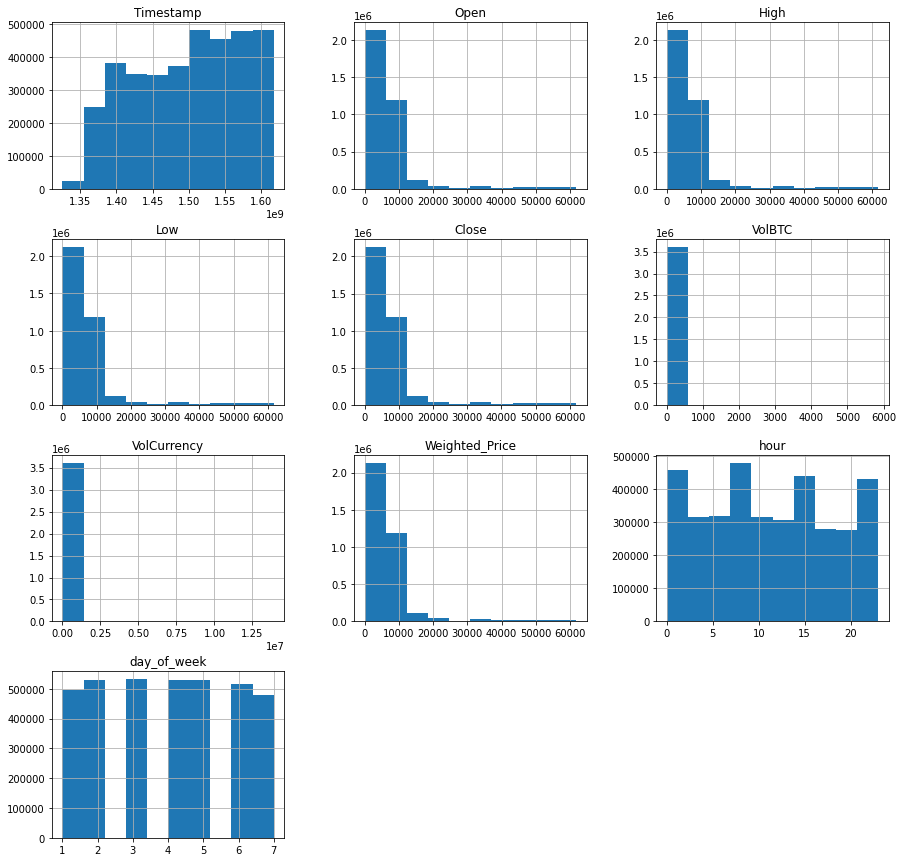



------------------------------------------------------------------------------------------------



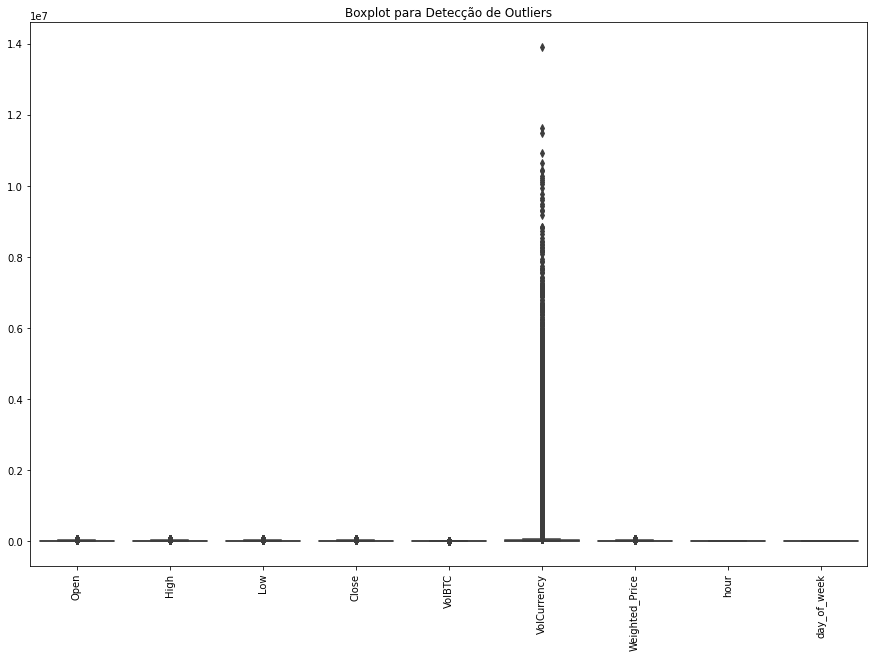

In [27]:
# Plot
df_pandas.hist(figsize = (15,15), bins = 10) 
plt.show()

print('\n\n------------------------------------------------------------------------------------------------\n')

# Visualização dos outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_pandas.loc[:, df_pandas.columns != 'Timestamp'])
plt.xticks(rotation=90)
plt.title('Boxplot para Detecção de Outliers')
plt.show()

### Interpretando

- A maioria dos dados de preços (abertura, fechamento, alta e baixa) está concentrada em valores mais baixos, com poucas ocorrências em valores mais altos.
- O volume de transações (VolBTC e VolCurrency) mostra uma distribuição altamente concentrada em valores baixos, com alguns valores extremamente altos.
- A variável hour está distribuído uniformemente, indicando que as transações ocorrem de maneira relativamente uniforme ao longo do dia.
- A variável day_of_week também está distribuído uniformemente, sugerindo que as transações ocorrem de maneira consistente ao longo da semana.

- A variável VolCurrency apresenta uma grande quantidade de outliers, indicando transações com volumes extremamente altos em alguns períodos.
- A variável VolBTC também apresenta outliers, mas em menor quantidade.

<br><br>

# Verificando Correlação

,Timestamp,Open,High,Low,Close,VolBTC,VolCurrency,Weighted_Price,hour,day_of_week
Timestamp,1.000000,0.650719,0.650644,0.650803,0.650714,-0.103926,0.228190,0.650737,0.032605,0.004181
Open,0.650719,1.000000,0.999999,0.999999,0.999999,-0.051860,0.344074,0.999999,0.021765,0.003780
High,0.650644,0.999999,1.000000,0.999998,0.999999,-0.051717,0.344498,0.999999,0.021739,0.003769
Low,0.650803,0.999999,0.999998,1.000000,0.999999,-0.052040,0.343541,1.000000,0.021798,0.003788
Close,0.650714,0.999999,0.999999,0.999999,1.000000,-0.051877,0.344036,1.000000,0.021767,0.003781
VolBTC,-0.103926,-0.051860,-0.051717,-0.052040,-0.051877,1.000000,0.352038,-0.051887,-0.034439,-0.006782
VolCurrency,0.228190,0.344074,0.344498,0.343541,0.344036,0.352038,1.000000,0.344010,-0.031129,-0.006950
Weighted_Price,0.650737,0.999999,0.999999,1.000000,1.000000,-0.051887,0.344010,1.000000,0.021768,0.003778
hour,0.032605,0.021765,0.021739,0.021798,0.021767,-0.034439,-0.031129,0.021768,1.000000,-0.011592
day_of_week,0.004181,0.003780,0.003769,0.003788,0.003781,-0.006782,-0.006950,0.003778,-0.011592,1.000000


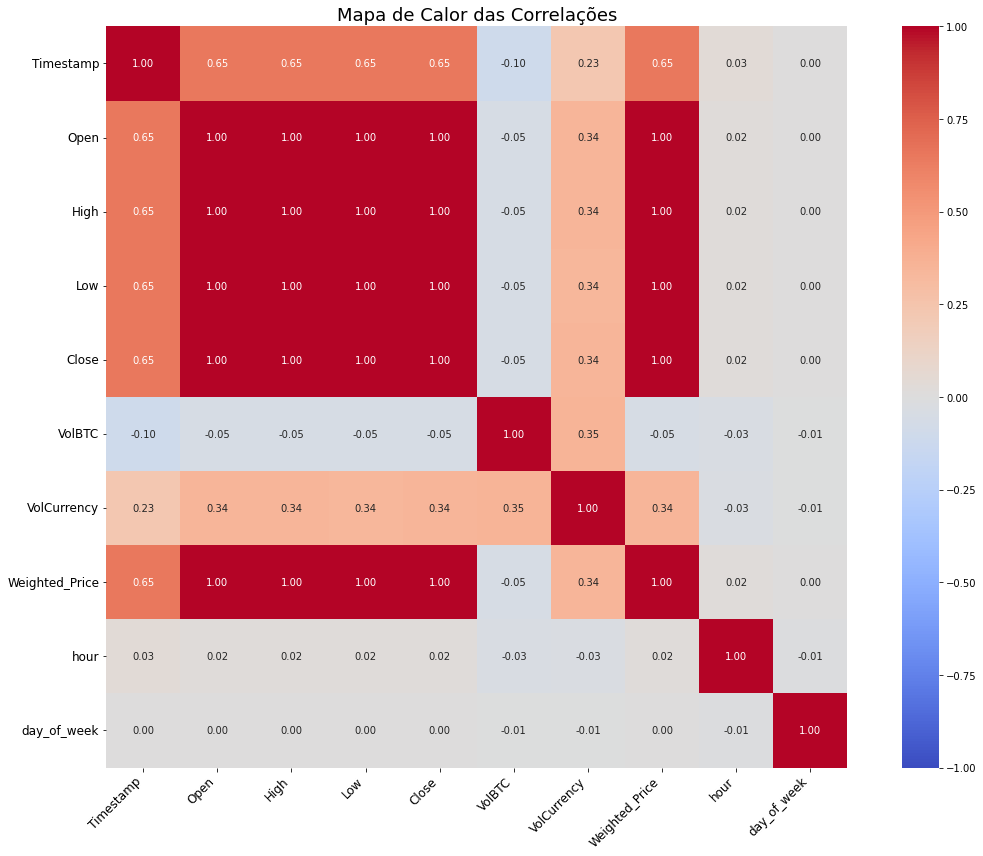



---------------------------------------------------------------------------------------------------



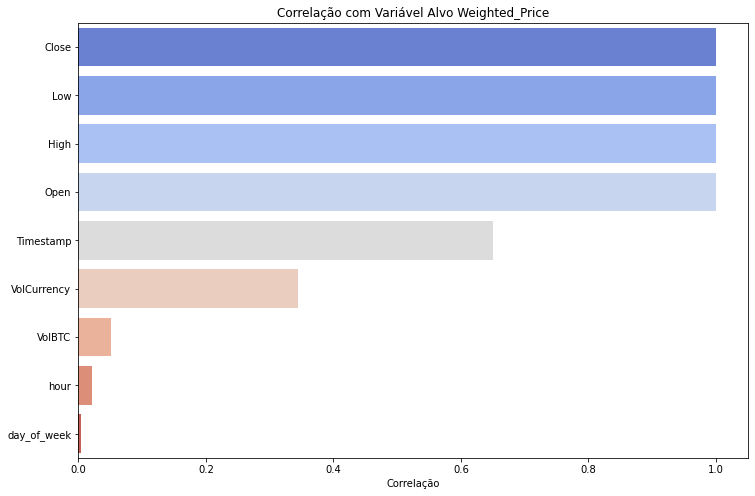

Close          1.000000
Low            1.000000
High           0.999999
Open           0.999999
Timestamp      0.650737
VolCurrency    0.344010
VolBTC         0.051887
hour           0.021768
day_of_week    0.003778
Name: Weighted_Price, dtype: float64

In [28]:
## Verificando Correlações através de Tabela

# Criando Tabela
display(df_pandas.corr())

print('\n\n=================================================================================================\n')


## Visualizando Correlações através de um Mapa de Calor

# Criando o Heatmap
corr_matrix = df_pandas.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(16, 12))  # Define o tamanho da figura maior
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True, annot_kws={"size": 10})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)  # Aumenta a fonte das labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)  # Aumenta a fonte das labels
plt.title('Mapa de Calor das Correlações', fontsize=18)  # Aumenta o título
plt.tight_layout()  # Ajusta o layout para evitar corte de labels
plt.show()

print('\n\n---------------------------------------------------------------------------------------------------\n')

# Calcular correlação com a variável alvo
correlation_target = df_pandas.corr()['Weighted_Price'].drop('Weighted_Price')

# Ordenar pela correlação absoluta
correlation_target_sorted = correlation_target.abs().sort_values(ascending=False)

# Visualizar as correlações
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_target_sorted.values, y=correlation_target_sorted.index, palette='coolwarm')
plt.title('Correlação com Variável Alvo Weighted_Price')
plt.xlabel('Correlação')
plt.show()

# Exibir correlações
display(correlation_target_sorted)

### Interpretando

- O mapa nos apresenta **altíssima correlação positiva** entre Open, Close, High, Low e Weighted_Price. Isso é esperado, pois todos esses valores representam diferentes aspectos do preço do Bitcoin.
- Timestamp tem uma **correlação moderada** com os preços, sugerindo uma tendência de aumento dos preços ao longo do tempo.
- VolCurrency tem uma **correlação positiva moderada** com os preços, enquanto VolBTC tem uma **correlação muito baixa**.

<br>

- Close, Low, High, Open têm **correlação extremamente alta** com Weighted_Price, o que era esperado.
- Timestamp tem uma **correlação moderada**, indicando que o preço ponderado tende a aumentar ao longo do tempo.
- VolCurrency tem uma **correlação positiva mais baixa**, indicando que o volume transacionado em moeda fiduciária tem algum impacto no preço ponderado.
- VolBTC, hour e day_of_week têm **correlação muito baixa**, indicando que essas variáveis têm pouco impacto direto no preço ponderado.

<br>

### Conclusão

- Observando a **altíssima correlação entre Open, Close, High e Low** e sabendo que elas **representam a mesma informação (valor de cotação)**, podemos concluir que há um **risco de multicolinearidade**. Isso pode afetar a estabilidade e a interpretabilidade do modelo preditivo. Para resolver esse problema, precisaremos aplicar técnicas de **seleção de variáveis**.

<br><br>

# Analisando com Outros Gráficos

<br>

#### Scatter Plot Volume Bitcoin x Volume Moeda

<Figure size 864x360 with 0 Axes>

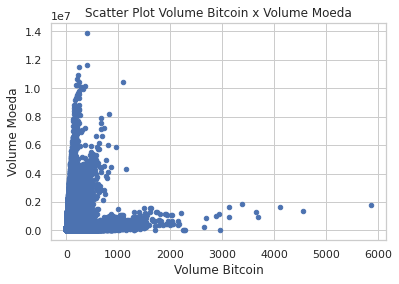

In [29]:
# Scatter Plot Volume Bitcoin x Volume Moeda
plt.figure(figsize = (12,5))
sns.set(style = 'whitegrid')
df_pandas.plot(kind = 'scatter', x = 'VolBTC', y = 'VolCurrency')
plt.xlabel('Volume Bitcoin')            
plt.ylabel('Volume Moeda')
plt.title('Scatter Plot Volume Bitcoin x Volume Moeda') 
plt.show()

### Interpretando

> Transações Pequenas: Grande variabilidade no valor em moeda fiduciária.

> Transações Grandes: Valor em moeda fiduciária mais consistente e previsível.

Isso pode indicar que o mercado de Bitcoin tem comportamentos diferentes para transações de diferentes tamanhos, com pequenas transações sendo mais voláteis em termos de valor em moeda fiduciária, enquanto grandes transações são mais estáveis.

<br>

#### Line Plot Cotação Open x High

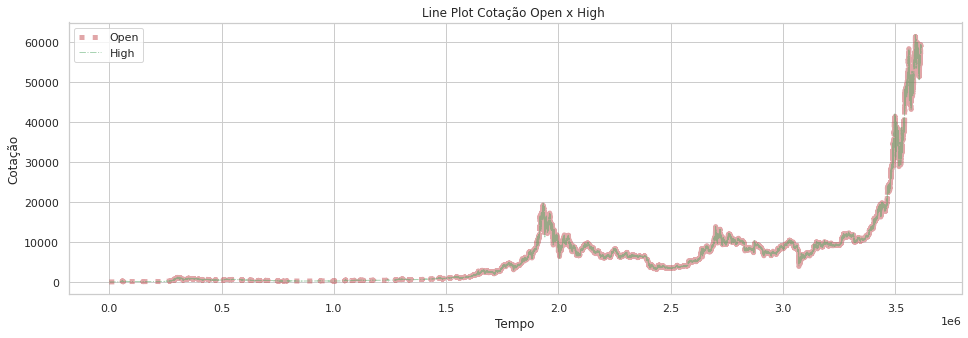

In [30]:
# Line Plot Cotação Open x High 
plt.figure(figsize = (16,5))
df_pandas.Open.plot(kind = 'line', 
                    color = 'r', 
                    label = 'Open', 
                    alpha = 0.5, 
                    linewidth = 5, 
                    grid = True, 
                    linestyle = ':')
df_pandas.High.plot(color = 'g', 
                    label = 'High', 
                    linewidth = 1, 
                    alpha = 0.5, 
                    grid = True, 
                    linestyle = '-.')
plt.legend(loc = 'upper left') 
plt.xlabel('Tempo')
plt.ylabel('Cotação')
plt.title('Line Plot Cotação Open x High ')
plt.show()

### Interpretando

O gráfico mostra as cotações de abertura (Open) e máxima (High) do Bitcoin ao longo do tempo. As seguintes observações podem ser feitas:

- Ambas as linhas (Open e High) seguem um padrão semelhante ao longo do tempo, indicando que a cotação máxima (High) é próxima da cotação de abertura (Open) em cada ponto de tempo.
- No início do gráfico, as cotações permanecem baixas e estáveis, mostrando pouca variação.
- A diferença entre as cotações Open e High é mínima ao longo do gráfico, o que sugere que o preço de abertura e o preço máximo em um determinado dia são muito próximos. Isso é indicado pela sobreposição das linhas representando Open e High.

<br>

#### Histograma da cotação de abertura

<AxesSubplot:ylabel='Frequency'>

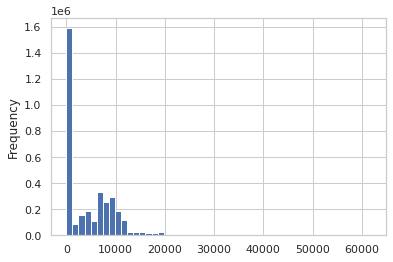

In [31]:
# Histograma da cotação de abertura
df_pandas.Open.plot(kind = 'hist', bins = 50)

### Interpretando

- A maioria dos valores está concentrada em faixas mais baixas, principalmente entre 0 e 10.000.
- A frequência diminui drasticamente à medida que os valores aumentam.
- Esse padrão é comum em dados financeiros onde a maioria das transações ocorre em valores mais baixos, mas algumas transações grandes ocorrem com menor frequência.

<br>

#### Plot do valor ponderado da cotação (variável alvo) por hora

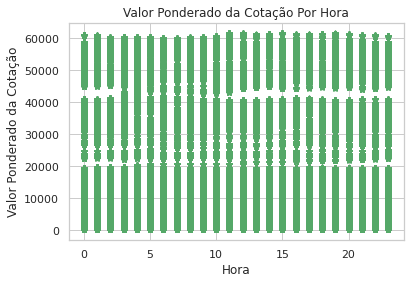

In [32]:
# Plot do valor ponderado da cotação (variável alvo) por hora
plt.plot(hour, weighted_price , 'g*')
plt.xlabel('Hora')            
plt.ylabel('Valor Ponderado da Cotação')
plt.title('Valor Ponderado da Cotação Por Hora') 
plt.show()

### Interpretando

O gráfico de dispersão mostra a relação entre a hora do dia (eixo x) e o valor ponderado da cotação do Bitcoin (eixo y).

- Os pontos estão distribuídos de maneira relativamente uniforme ao longo das 24 horas do dia.
- O valor ponderado da cotação do Bitcoin parece não ter uma correlação clara com a hora do dia.

<br>

#### Plot do valor ponderado da cotação por dia da semana

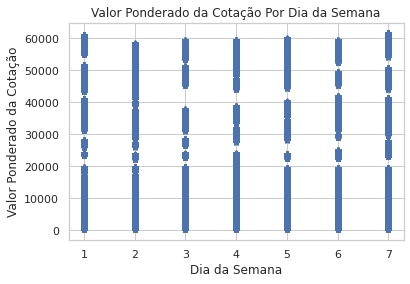

In [33]:
# Plot do valor ponderado da cotação por dia da semana
plt.plot(date_of_week, weighted_price, 'b*')
plt.xlabel('Dia da Semana')            
plt.ylabel('Valor Ponderado da Cotação')
plt.title('Valor Ponderado da Cotação Por Dia da Semana') 
plt.show()

### Interpretando

O gráfico de dispersão mostra a relação entre o dia da semana (eixo x) e o valor ponderado da cotação do Bitcoin (eixo y). Os dias da semana são representados numericamente de 1 (domingo) a 7 (sábado).

- Os pontos estão distribuídos uniformemente ao longo dos dias da semana.
- Isso sugere que o valor ponderado da cotação do Bitcoin não varia significativamente com o dia da semana.

<br>

#### Plot do VolBTC por hora

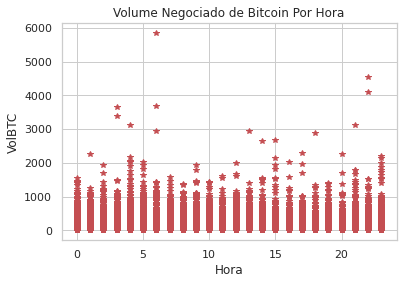

In [34]:
# Plot do VolBTC por hora
plt.plot(hour, volume_BTC, 'r*')
plt.xlabel('Hora')            
plt.ylabel('VolBTC')
plt.title('Volume Negociado de Bitcoin Por Hora') 
plt.show()

### Interpretando

- O volume negociado de Bitcoin é bastante variável ao longo das horas do dia.
- Existe uma quantidade considerável de outliers em diversas horas do dia, indicando que em algumas horas específicas, ocorreram transações de grande volume. Porém, a maior parte das transações de Bitcoin ocorre em volumes mais baixos e de forma mais consistente ao longo das horas.

<br>

#### Plot de VolBTC por dia da semana

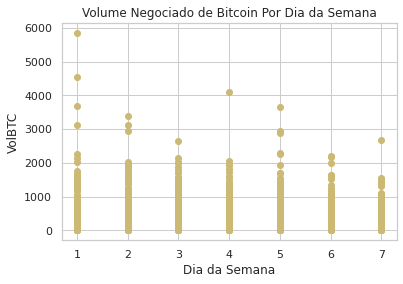

In [35]:
# Plot de VolBTC por dia da semana
plt.plot(date_of_week, volume_BTC, 'yo')
plt.xlabel('Dia da Semana')            
plt.ylabel('VolBTC')
plt.title('Volume Negociado de Bitcoin Por Dia da Semana') 
plt.show()

### Interpretando

- O volume de negociação parece ter uma distribuição similar ao longo dos dias da semana.
- Não há uma variação significativa no volume negociado de Bitcoin dependendo do dia da semana, sugerindo que o volume de negociação é relativamente consistente. Existem alguns picos de transação, mas eles ocorrem em diferentes dias da semana, sem um padrão claro.

<br>

#### Plot do valor ponderado da cotação por ano

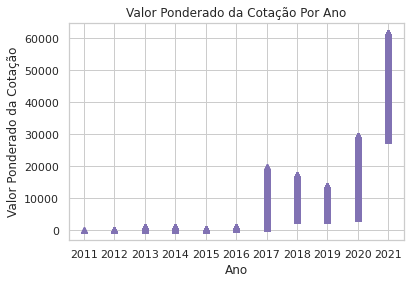

In [36]:
# Plot do valor ponderado da cotação por ano
plt.plot(year, weighted_price , 'm^')
plt.xlabel('Ano')            
plt.ylabel('Valor Ponderado da Cotação')
plt.title('Valor Ponderado da Cotação Por Ano') 
plt.show()

### Interpretando

- O gráfico mostra um aumento significativo no valor ponderado da cotação do Bitcoin ao longo dos anos, especialmente a partir de 2016. Isso indica uma tendência de alta acentuada no preço do Bitcoin, refletindo seu crescente valor de mercado e adoção ao longo do tempo.

<br>

#### Plot do Volume por ano

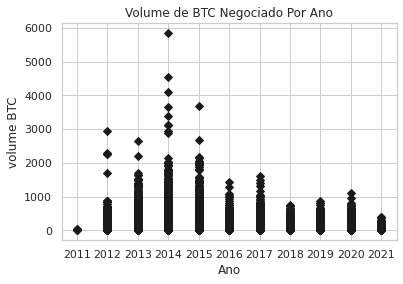

In [37]:
# Plot do Volume por ano
plt.plot(year, volume_BTC , 'kD')
plt.xlabel('Ano')            
plt.ylabel('volume BTC')
plt.title('Volume de BTC Negociado Por Ano') 
plt.show()

### Interpretando

- O gráfico mostra que o volume de Bitcoin negociado atingiu picos significativos em 2014 e 2015, seguido por uma queda nos anos subsequentes. Isso pode refletir eventos específicos do mercado ou mudanças na atividade de negociação.

<br> <br> <br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Engenharia de Atributos</span>

- Nesta etapa aplicaremos iremos **remover colunas** não relevantes e iremos **aplicar a função VectorAssembler** que é um transformador que combina uma determinada lista de colunas em uma única coluna de vetor. 

<br>

### Removendo Colunas

- Como vimos anteriormente as colunas **date**, **time**, **hour**, **day_of_week** e **year** não são relevantes ou não aparesentam correlação significativa com a variável alvo **Weighted_Price**.

In [38]:
## Usamos novamente o objeto PySpark

# Verificando os Tipos das Colunas
dados.printSchema()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- VolBTC: double (nullable = true)
 |-- VolCurrency: double (nullable = true)
 |-- Weighted_Price: double (nullable = true)
 |-- dateTime: date (nullable = true)
 |-- date: date (nullable = true)
 |-- time: string (nullable = true)
 |-- hour: double (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- year: string (nullable = true)



In [39]:
# Removendo as colunas que não são relevantes
dados = dados.drop('date', 'time', 'hour', 'day_of_week', 'year')

# Verificando os Tipos das Colunas
dados.printSchema()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- VolBTC: double (nullable = true)
 |-- VolCurrency: double (nullable = true)
 |-- Weighted_Price: double (nullable = true)
 |-- dateTime: date (nullable = true)



<br>

### Aplicando Função VectorAssembler 

- Criando um **Objeto Vetor de Atributos** e adicionando ao Dataframe
- As **colunas selecionadas** foram escolhidas a partir das análises feita anteriormente.

In [88]:
# Prepara o vetor de atributos (Este processo combina as colunas definidas em uma única coluna vetorial)
assembler = VectorAssembler(inputCols = ['Open', 'VolBTC', 'VolCurrency'], 
                            outputCol = "features")

# Criando o Pipeline com o VectorAssembler
pipeline_vector = Pipeline(stages=[assembler])

# Ajustando o Pipeline aos dados
pipeline_model_vector = pipeline_vector.fit(dados)

# Adicionar a nova coluna ao DataFrame
df_assembled = pipeline_model_vector.transform(dados)

# Verificando os Tipos das Colunas
df_assembled.printSchema()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- VolBTC: double (nullable = true)
 |-- VolCurrency: double (nullable = true)
 |-- Weighted_Price: double (nullable = true)
 |-- dateTime: date (nullable = true)
 |-- features: vector (nullable = true)



In [89]:
df_assembled.show(5)

+----------+----+----+----+-----+-----------+------------+--------------+----------+--------------------+
| Timestamp|Open|High| Low|Close|     VolBTC| VolCurrency|Weighted_Price|  dateTime|            features|
+----------+----+----+----+-----+-----------+------------+--------------+----------+--------------------+
|1325317920|4.39|4.39|4.39| 4.39| 0.45558087|2.0000000193|          4.39|2011-12-30|[4.39,0.45558087,...|
|1325346600|4.39|4.39|4.39| 4.39|       48.0|      210.72|          4.39|2011-12-31|  [4.39,48.0,210.72]|
|1325350740| 4.5|4.57| 4.5| 4.57|37.86229723|171.38033753|  4.5264114983|2011-12-31|[4.5,37.86229723,...|
|1325350800|4.58|4.58|4.58| 4.58|        9.0|       41.22|          4.58|2011-12-31|    [4.58,9.0,41.22]|
|1325391360|4.58|4.58|4.58| 4.58|      1.502|     6.87916|          4.58|2011-12-31|[4.58,1.502,6.87916]|
+----------+----+----+----+-----+-----------+------------+--------------+----------+--------------------+
only showing top 5 rows



<br><br><br><br>

# Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

<br><br>


## Dividindo os dados em Dados de Treino e Dados de Teste
- Nós **treinamos** o modelo com **dados de treino** e **avaliamos** o modelo com **dados de teste**.

<br>

In [42]:
# Divisão em dados de treino e teste
dados_treino, dados_teste = df_assembled.randomSplit([.7,.3], seed = rnd_seed)

<br>

## Tratamento de Escala

> **Normalização** ou **Padronização**

- A transformação (como escalonamento) precisa ser aplicada nos dados de teste usando os parâmetros calculados a partir dos dados de treino para garantir a consistência. 

<br>


### Normalizando os Dados

- A normalização foi escolhida devido às diferenças significativas nas escalas das variáveis de entrada (como Open, VolBTC e VolCurrency), garantindo que todas contribuam proporcionalmente durante o treinamento do modelo. Isso é especialmente importante para algoritmos sensíveis à escala e baseados em distância. Além disso, a normalização facilita a interpretação dos resultados, melhora a eficiência computacional e é adequada para a natureza volátil dos dados de criptomoedas.

<br>

- A normalização será aplicada **apenas à variável features** para garantir a consistência das transformações entre os dados de treino e teste, utilizando os parâmetros calculados a partir dos dados de treino.

<br>

- Será criado um **pipeline** com as etapas de transformação (não está incluindo a etapa de VectorAssembler)

In [43]:
# Cria o scaler (selecionando apenas a coluna features)
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Define o pipeline com as etapas de transformação
pipeline = Pipeline(stages=[scaler])

# Fit no pipeline usando os dados de treino
pipeline_model = pipeline.fit(dados_treino)

# Transform nos dados de treino e teste
dados_treino_scaled = pipeline_model.transform(dados_treino)
dados_teste_scaled = pipeline_model.transform(dados_teste)

In [44]:
# Visualizando os dados
#dados_treino_scaled.show(5, truncate = False)

# Visualizando apenas as colunas features e scaled_features
dados_treino_scaled.select("features", "scaled_features").show(10, truncate = False)

+-------------------------------+------------------------------------------------------------------+
|features                       |scaled_features                                                   |
+-------------------------------+------------------------------------------------------------------+
|[4.39,48.0,210.72]             |[9.557729822093386E-6,0.011673503471190906,1.8335460613525925E-5] |
|[4.5,37.86229723,171.38033753] |[1.1339679449941311E-5,0.00920803454461806,1.4912383393669768E-5] |
|[4.58,9.0,41.22]               |[1.263564281564889E-5,0.0021887819008482947,3.58669175441125E-6]  |
|[4.84,10.0,48.4]               |[1.6847523754198516E-5,0.0024319798898314385,4.211447863015635E-6]|
|[5.0,10.1,50.5]                |[1.9439450485613674E-5,0.002456299688729753,4.3941759727745785E-6]|
|[5.14,0.68,3.4952]             |[2.170738637560193E-5,1.6537463250853785E-4,3.041291853473605E-7] |
|[5.26,29.31939163,154.21999997]|[2.36513314241633E-5,0.00713041708262522,1.341920432454396

In [45]:
# Verificando colunas
print(dados_treino_scaled.columns)
print('\n-------------------------------------------------------------------------------------------------\n')
print(dados_treino_scaled.count())
print('\n-------------------------------------------------------------------------------------------------\n')
print(dados_teste_scaled.count())

['Timestamp', 'Open', 'High', 'Low', 'Close', 'VolBTC', 'VolCurrency', 'Weighted_Price', 'dateTime', 'features', 'scaled_features']

-------------------------------------------------------------------------------------------------

2528585

-------------------------------------------------------------------------------------------------

1085184


<br><br><br><br><br>

<span style="color: green; font-size: 40px; font-weight: bold;">Construindo Modelos de Machine Learning</span>


<br><br><br>

## Criando Dataframe para salvar métricas de cada Modelo

In [46]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 1 com Regressão Linear (Benchmark)</span>

<br>

> # Versão 1

- Sem Ajuste de Hiperparâmetros


<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

+-----------------+--------------+
|  Predicted_price|Weighted_Price|
+-----------------+--------------+
|7.452551600537271|          4.39|
|7.642451952579105|          4.58|
|8.062231678145261|           5.0|
|8.382063850005192|          5.32|
|8.352079583893323|          5.29|
|8.352079583893323|          5.29|
|8.252132030187095|          5.19|
|8.422042871487683|  5.3604618117|
| 8.81183833094197|   5.777027027|
| 9.06170721520754|           6.0|
+-----------------+--------------+
only showing top 10 rows


-----------------------------------------------------------------------------------------------------

Mean Absolute Error (MAE) nos dados de teste: 5.006023486830377

-----------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE) nos dados de teste = 11.308945189774224

-----------------------------------------------------------------------------------------------------



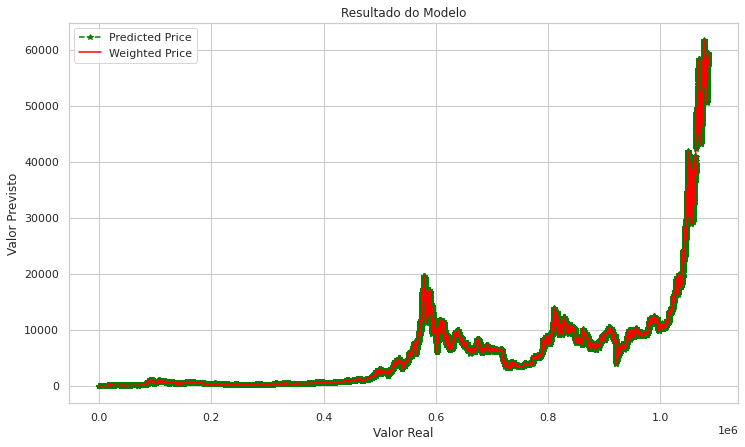


-----------------------------------------------------------------------------------------------------



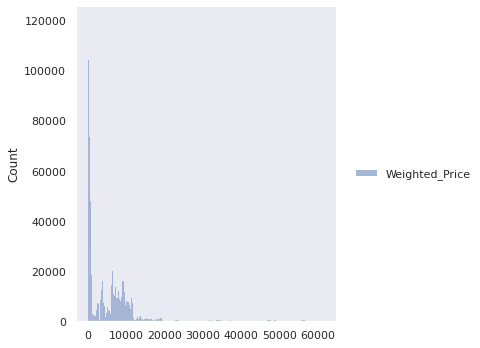

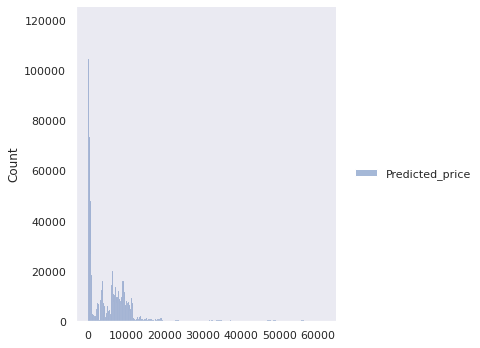

In [47]:
## Criação e Treinamento

# Cria o modelo de regressão linear
modelo_lr_v1 = LinearRegression(featuresCol='scaled_features', 
                                labelCol='Weighted_Price', 
                                predictionCol='Predicted_price', 
                                maxIter=100, 
                                regParam=0.3, 
                                elasticNetParam=0.8, 
                                standardization=False)

# Treina o modelo
modelo_v1 = modelo_lr_v1.fit(dados_treino_scaled)

# Salva o modelo em disco
#modelo_v1.write().overwrite().save("modelos/modelo_v1")


## Previsões

# Previsões com dados de teste
previsoes_v1 = modelo_v1.transform(dados_teste_scaled)

# Seleciona as colunas
previsoes_v1.select("Predicted_price", "Weighted_Price").show(10)

print('\n-----------------------------------------------------------------------------------------------------\n')


## Avaliações

# Mean Absolute Error
mae_v1 = previsoes_v1.selectExpr("avg(abs(Predicted_price - Weighted_Price)) as mae").collect()[0]["mae"]
print(f"Mean Absolute Error (MAE) nos dados de teste: {mae_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Cria um avaliador para o modelo de regressão
evaluator = RegressionEvaluator(labelCol="Weighted_Price", 
                                predictionCol="Predicted_price", 
                                metricName="rmse")

# Aplica o avaliador
rmse_v1 = evaluator.evaluate(previsoes_v1)
print(f"Root Mean Squared Error (RMSE) nos dados de teste = {rmse_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Extrai as previsões
pred_results_v1 = modelo_v1.evaluate(dados_teste_scaled)

# Valores reais de Y sendo convertidos para o formato do Pandas
Y = pred_results_v1.predictions.select('Weighted_Price').toPandas()

# Valores previstos de Y sendo convertidos para o formato do Pandas
_Y = pred_results_v1.predictions.select("Predicted_price").toPandas()

# Plot dos valores reais x valores previstos
plt.figure(figsize=(12, 7))
plt.plot(Y, color='green', marker='*', linestyle='dashed', label='Predicted Price')
plt.plot(_Y, color='red', label='Weighted Price')
plt.title('Resultado do Modelo')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.legend()
plt.show()

print('\n-----------------------------------------------------------------------------------------------------\n')

# Distribuição dos valores reais x valores previstos
sns.set_style("dark")
sns.displot(Y, color="r", label="Valores Reais")
sns.displot(_Y, color="b", label="Valores Previstos")
plt.show()


Avaliação do Modelo (Escala Original)

MAE - Erro Médio Absoluto (Escala Original): 5.0060234868304105
MSE - Erro Quadrático Médio (Escala Original): 127.89224130531824
RMSE - Raiz Quadrada do Erro Quadrático Médio (Escala Original): 11.308945189774255
Coeficiente R2 (Escala Original): 0.9999984159163787
Variância Explicada (Escala Original): 0.9999984159170578

-----------------------------------------------------------------------------------------------------


ANÁLISE DE RESÍDUOS



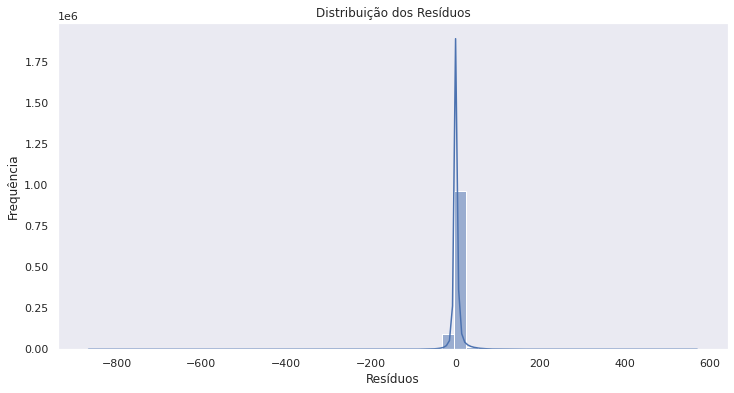

In [48]:
# Avaliações
mae = mean_absolute_error(Y, _Y)
mse = mean_squared_error(Y, _Y)
rmse = np.sqrt(mse)
r2 = r2_score(Y, _Y)
evs = explained_variance_score(Y, _Y)

print('\nAvaliação do Modelo (Escala Original)\n')
print(f'MAE - Erro Médio Absoluto (Escala Original): {mae}')
print(f'MSE - Erro Quadrático Médio (Escala Original): {mse}')
print(f'RMSE - Raiz Quadrada do Erro Quadrático Médio (Escala Original): {rmse}')
print(f'Coeficiente R2 (Escala Original): {r2}')
print(f'Variância Explicada (Escala Original): {evs}')

print('\n-----------------------------------------------------------------------------------------------------\n')


# Análise de Resíduos
print('\nANÁLISE DE RESÍDUOS\n')

# Calculando os resíduos
residuos = Y['Weighted_Price'] - _Y['Predicted_price']

# Convertendo para DataFrame para facilitar a manipulação
df_residuos = pd.DataFrame({'Weighted_Price': Y['Weighted_Price'], 'Predicted_price': _Y['Predicted_price'], 'Residuo': residuos})

# Histograma dos resíduos
plt.figure(figsize=(12, 6))
sns.histplot(df_residuos['Residuo'], bins=50, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')
plt.show()

<br>

### Salvando as Métricas

In [49]:
# Criando um DataFrame para salvar as métricas
modelo_v1_metrics = pd.DataFrame({
    'Nome do Modelo': ['Regressão Linear'],
    'Versao': ['1'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Sem Ajuste de Hiperparâmetros'], 
    'MAE': [f"{mae:.2f}"],
    'MSE': [f"{mse:.2f}"],
    'RMSE': [rmse],
    'Coeficiente R2': [r2],
    'Variância Explicada': [evs]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_v1_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Regressão Linear,1,Original,Sem Ajuste de Hiperparâmetros,5.01,127.89,11.308945,0.999998,0.999998


<br>

> # Versão 2

- Com Ajuste de Hiperparâmetros

<br>


### Configurando Hiperparâmetros

In [50]:
## Configuração de Hiperparâmetros

# Cria o modelo
modelo_lr_v2 = (LinearRegression(featuresCol = 'scaled_features', 
                                 labelCol = "Weighted_Price", 
                                 predictionCol = 'Predicted_price'))

# Cria um grid para otimização de hiperparâmetros
grid = ParamGridBuilder().addGrid(modelo_lr_v2.maxIter, [50, 100]).build()

# Cria o avaliador (será usado na validação cruzada)
evaluator = RegressionEvaluator(labelCol = "Weighted_Price", 
                                predictionCol = "Predicted_price", 
                                metricName = "rmse")

# Cria o CrossValidator
cv = CrossValidator(estimator = modelo_lr_v2, estimatorParamMaps = grid, evaluator = evaluator, parallelism = 2)

<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

+------------------+--------------+
|   Predicted_price|Weighted_Price|
+------------------+--------------+
| 4.504909012297221|          4.39|
| 4.694203324164685|          4.58|
|5.1023630413359795|           5.0|
| 5.433574719955553|          5.32|
| 5.385412108823919|          5.29|
|  5.39758488984133|          5.29|
| 5.303426517610845|          5.19|
| 5.465997158226096|  5.3604618117|
| 5.855180173595436|   5.777027027|
| 6.113688036802646|           6.0|
+------------------+--------------+
only showing top 10 rows


-----------------------------------------------------------------------------------------------------

Mean Absolute Error (MAE) nos dados de teste: 3.3749817066294443

-----------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE) nos dados de teste = 10.378583417800511

-----------------------------------------------------------------------------------------------------



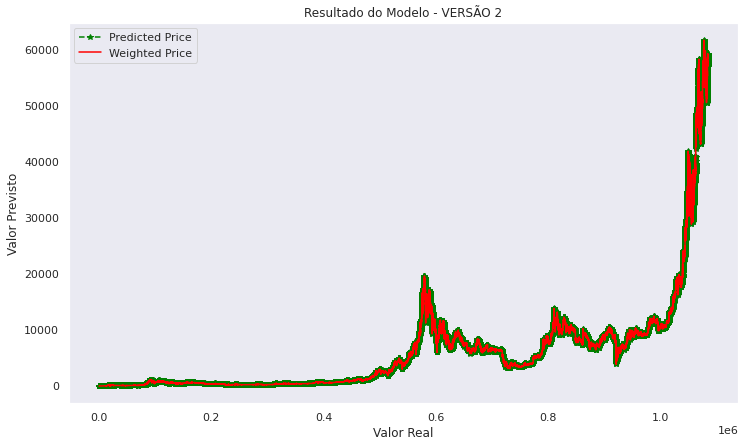


-----------------------------------------------------------------------------------------------------



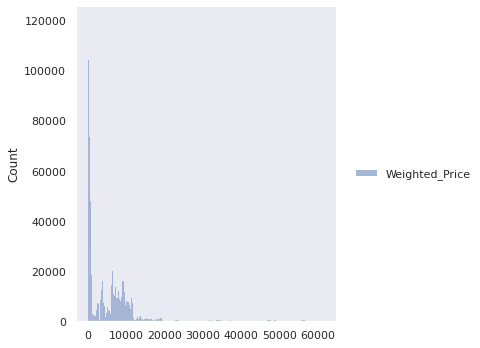

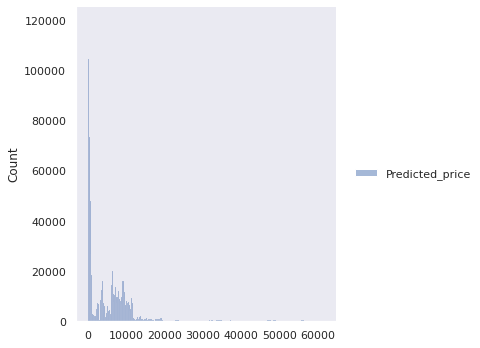

In [51]:
## Criação e Treinamento

# Treina o CrossValidator
cvModel = cv.fit(dados_treino_scaled)

# Extrai o melhor modelo do CrossValidator
modelo_v2 = cvModel.bestModel

# Salva o modelo em disco
#modelo_v2.write().overwrite().save("modelos/modelo_v2")


## Previsões

# Previsões com dados de teste
previsoes_v2 = modelo_v2.transform(dados_teste_scaled)

# Seleciona as colunas
previsoes_v2.select("Predicted_price", "Weighted_Price").show(10)

print('\n-----------------------------------------------------------------------------------------------------\n')


## Avaliações

# Mean Absolute Error
mae_v2 = previsoes_v2.selectExpr("avg(abs(Predicted_price - Weighted_Price)) as mae").collect()[0]["mae"]
print(f"Mean Absolute Error (MAE) nos dados de teste: {mae_v2}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Aplica o avaliador
rmse_v2 = evaluator.evaluate(previsoes_v2)
print(f"Root Mean Squared Error (RMSE) nos dados de teste = {rmse_v2}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Extrai as previsões
pred_results_v2 = modelo_v2.evaluate(dados_teste_scaled)

# Valores reais de Y sendo convertidos para o formato do Pandas
Y_v2 = pred_results_v2.predictions.select('Weighted_Price').toPandas()

# Valores previstos de Y sendo convertidos para o formato do Pandas
_Y_v2 = pred_results_v2.predictions.select("Predicted_price").toPandas()

# Plot dos valores reais x valores previstos
plt.figure(figsize=(12, 7))
plt.plot(Y_v2, color='green', marker='*', linestyle='dashed', label='Predicted Price')
plt.plot(_Y_v2, color='red', label='Weighted Price')
plt.title('Resultado do Modelo - VERSÃO 2')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.legend()
plt.show()

print('\n-----------------------------------------------------------------------------------------------------\n')

# Distribuição dos valores reais x valores previstos
sns.set_style("dark")
sns.displot(Y_v2, color="r", label="Valores Reais")
sns.displot(_Y_v2, color="b", label="Valores Previstos")
plt.show()


Avaliação do Modelo (VERSÃO 2)

MAE - Erro Médio Absoluto (VERSÃO 2): 3.374981706629446
MSE - Erro Quadrático Médio (VERSÃO 2): 107.71499376024323
RMSE - Raiz Quadrada do Erro Quadrático Médio (VERSÃO 2): 10.378583417800487
Coeficiente R2 (VERSÃO 2): 0.999998665833395
Variância Explicada (VERSÃO 2): 0.9999986658340747

-----------------------------------------------------------------------------------------------------


ANÁLISE DE RESÍDUOS (VERSÃO 2)



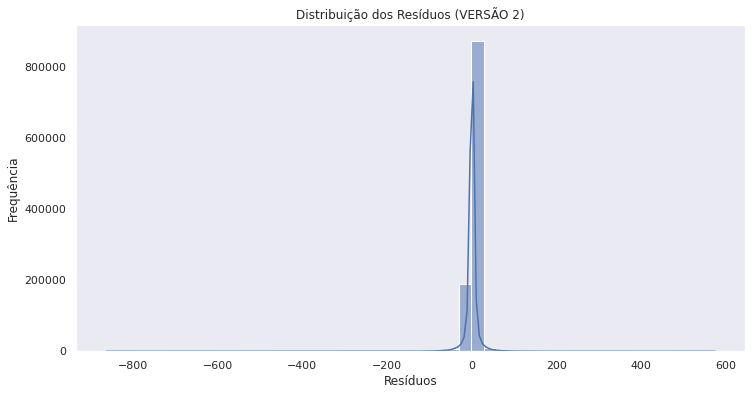

In [52]:
# Avaliações
mae_v2 = mean_absolute_error(Y_v2, _Y_v2)
mse_v2 = mean_squared_error(Y_v2, _Y_v2)
rmse_v2 = np.sqrt(mse_v2)
r2_v2 = r2_score(Y_v2, _Y_v2)
evs_v2 = explained_variance_score(Y_v2, _Y_v2)

print('\nAvaliação do Modelo (VERSÃO 2)\n')
print(f'MAE - Erro Médio Absoluto (VERSÃO 2): {mae_v2}')
print(f'MSE - Erro Quadrático Médio (VERSÃO 2): {mse_v2}')
print(f'RMSE - Raiz Quadrada do Erro Quadrático Médio (VERSÃO 2): {rmse_v2}')
print(f'Coeficiente R2 (VERSÃO 2): {r2_v2}')
print(f'Variância Explicada (VERSÃO 2): {evs_v2}')

print('\n-----------------------------------------------------------------------------------------------------\n')

# Análise de Resíduos
print('\nANÁLISE DE RESÍDUOS (VERSÃO 2)\n')

# Calculando os resíduos
residuos_v2 = Y_v2['Weighted_Price'] - _Y_v2['Predicted_price']

# Convertendo para DataFrame para facilitar a manipulação
df_residuos_v2 = pd.DataFrame({'Weighted_Price': Y_v2['Weighted_Price'], 'Predicted_price': _Y_v2['Predicted_price'], 'Residuo': residuos_v2})

# Histograma dos resíduos
plt.figure(figsize=(12, 6))
sns.histplot(df_residuos_v2['Residuo'], bins=50, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos (VERSÃO 2)')
plt.show()

<br>

### Salvando as Métricas

In [53]:
# Criando um DataFrame para salvar as métricas
modelo_v2_metrics = pd.DataFrame({
    'Nome do Modelo': ['Regressão Linear'],
    'Versao': ['2'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Com Ajuste de Hiperparâmetros'], 
    'MAE': [f"{mae_v2:.2f}"],
    'MSE': [f"{mse_v2:.2f}"],
    'RMSE': [rmse_v2],
    'Coeficiente R2': [r2_v2],
    'Variância Explicada': [evs_v2]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_v2_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Regressão Linear,1,Original,Sem Ajuste de Hiperparâmetros,5.01,127.89,11.308945,0.999998,0.999998
1,Regressão Linear,2,Original,Com Ajuste de Hiperparâmetros,3.37,107.71,10.378583,0.999999,0.999999


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 2 com Decision Tree Regressor</span>

<br>

> # Versão 1

- Sem Ajuste de Hiperparâmetros


<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

+------------------+--------------+
|   Predicted_price|Weighted_Price|
+------------------+--------------+
|202.02580633044855|          4.39|
|202.02580633044855|          4.58|
|202.02580633044855|           5.0|
|202.02580633044855|          5.32|
|202.02580633044855|          5.29|
|202.02580633044855|          5.29|
|202.02580633044855|          5.19|
|202.02580633044855|  5.3604618117|
|202.02580633044855|   5.777027027|
|202.02580633044855|           6.0|
+------------------+--------------+
only showing top 10 rows


-----------------------------------------------------------------------------------------------------

Mean Absolute Error (MAE) nos dados de teste: 547.415088028304

-----------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE) nos dados de teste = 1621.3405285419283

-----------------------------------------------------------------------------------------------------



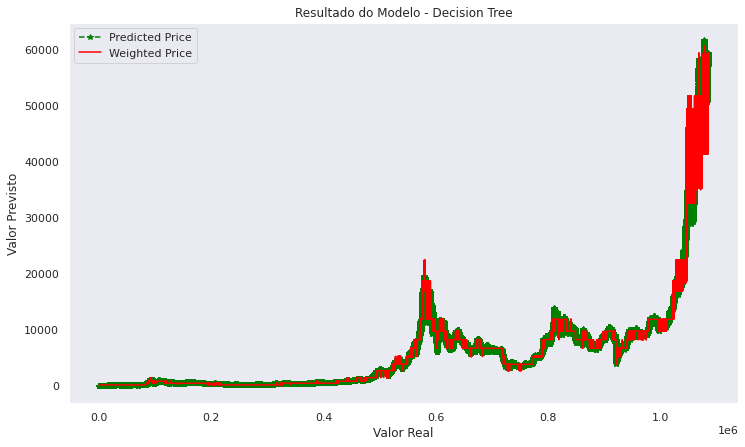


-----------------------------------------------------------------------------------------------------



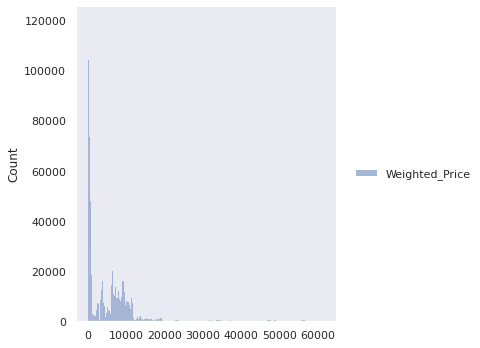

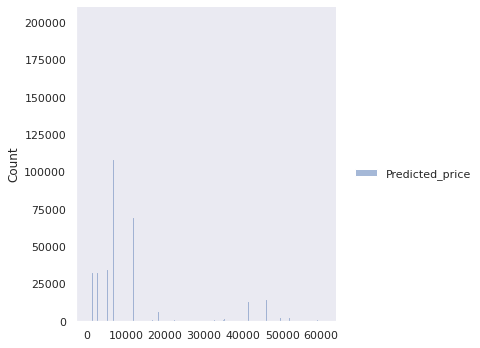


Avaliação do Modelo (Decision Tree)

MAE - Erro Médio Absoluto (Decision Tree): 547.4150880283004
MSE - Erro Quadrático Médio (Decision Tree): 2628745.1094926097
RMSE - Raiz Quadrada do Erro Quadrático Médio (Decision Tree): 1621.3405285419253
Coeficiente R2 (Decision Tree): 0.9674401509427288
Variância Explicada (Decision Tree): 0.9674401850372675

-----------------------------------------------------------------------------------------------------


ANÁLISE DE RESÍDUOS (Decision Tree)



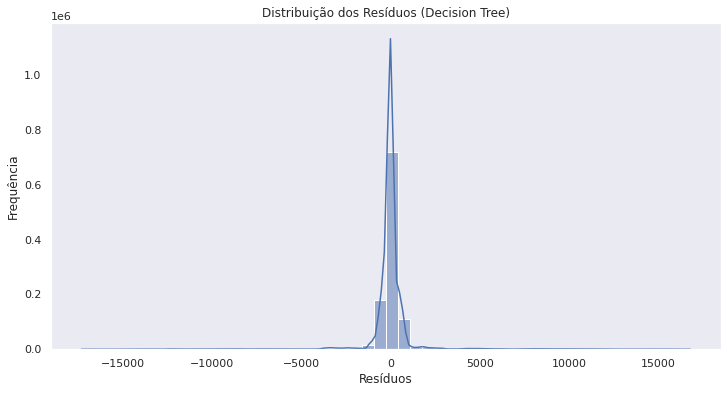

In [54]:
# Criação e Treinamento

modelo_dt_v1 = DecisionTreeRegressor(featuresCol='scaled_features', 
                                     labelCol='Weighted_Price', 
                                     predictionCol='Predicted_price')

# Treina o modelo
modelo_dt_v1 = modelo_dt_v1.fit(dados_treino_scaled)

## Previsões

# Previsões com dados de teste
previsoes_dt_v1 = modelo_dt_v1.transform(dados_teste_scaled)

# Seleciona as colunas
previsoes_dt_v1.select("Predicted_price", "Weighted_Price").show(10)

print('\n-----------------------------------------------------------------------------------------------------\n')

## Avaliações

# Mean Absolute Error
mae_dt_v1 = previsoes_dt_v1.selectExpr("avg(abs(Predicted_price - Weighted_Price)) as mae").collect()[0]["mae"]
print(f"Mean Absolute Error (MAE) nos dados de teste: {mae_dt_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Cria um avaliador para o modelo de regressão
evaluator_dt = RegressionEvaluator(labelCol="Weighted_Price", 
                                   predictionCol="Predicted_price", 
                                   metricName="rmse")

# Aplica o avaliador
rmse_dt_v1 = evaluator_dt.evaluate(previsoes_dt_v1)
print(f"Root Mean Squared Error (RMSE) nos dados de teste = {rmse_dt_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Convertendo as previsões para Pandas
Y_dt = previsoes_dt_v1.select('Weighted_Price').toPandas()
_Y_dt = previsoes_dt_v1.select("Predicted_price").toPandas()

# Plot dos valores reais x valores previstos
plt.figure(figsize=(12, 7))
plt.plot(Y_dt, color='green', marker='*', linestyle='dashed', label='Predicted Price')
plt.plot(_Y_dt, color='red', label='Weighted Price')
plt.title('Resultado do Modelo - Decision Tree')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.legend()
plt.show()

print('\n-----------------------------------------------------------------------------------------------------\n')

# Distribuição dos valores reais x valores previstos
sns.set_style("dark")
sns.displot(Y_dt, color="r", label="Valores Reais")
sns.displot(_Y_dt, color="b", label="Valores Previstos")
plt.show()

# Avaliações
mae_dt = mean_absolute_error(Y_dt, _Y_dt)
mse_dt = mean_squared_error(Y_dt, _Y_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(Y_dt, _Y_dt)
evs_dt = explained_variance_score(Y_dt, _Y_dt)

print('\nAvaliação do Modelo (Decision Tree)\n')
print(f'MAE - Erro Médio Absoluto (Decision Tree): {mae_dt}')
print(f'MSE - Erro Quadrático Médio (Decision Tree): {mse_dt}')
print(f'RMSE - Raiz Quadrada do Erro Quadrático Médio (Decision Tree): {rmse_dt}')
print(f'Coeficiente R2 (Decision Tree): {r2_dt}')
print(f'Variância Explicada (Decision Tree): {evs_dt}')

print('\n-----------------------------------------------------------------------------------------------------\n')

# Análise de Resíduos
print('\nANÁLISE DE RESÍDUOS (Decision Tree)\n')

# Calculando os resíduos
residuos_dt = Y_dt['Weighted_Price'] - _Y_dt['Predicted_price']

# Convertendo para DataFrame para facilitar a manipulação
df_residuos_dt = pd.DataFrame({'Weighted_Price': Y_dt['Weighted_Price'], 'Predicted_price': _Y_dt['Predicted_price'], 'Residuo': residuos_dt})

# Histograma dos resíduos
plt.figure(figsize=(12, 6))
sns.histplot(df_residuos_dt['Residuo'], bins=50, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos (Decision Tree)')
plt.show()

<br>

### Salvando as Métricas

In [55]:
# Criando um DataFrame para salvar as métricas
modelo_dt_v1_metrics = pd.DataFrame({
    'Nome do Modelo': ['Decision Tree Regressor'],
    'Versao': ['1'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Sem Ajuste de Hiperparâmetros'], 
    'MAE': [f"{mae_dt:.2f}"],
    'MSE': [f"{mse_dt:.2f}"],
    'RMSE': [rmse_dt],
    'Coeficiente R2': [r2_dt],
    'Variância Explicada': [evs_dt]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_dt_v1_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Regressão Linear,1,Original,Sem Ajuste de Hiperparâmetros,5.01,127.89,11.308945,0.999998,0.999998
1,Regressão Linear,2,Original,Com Ajuste de Hiperparâmetros,3.37,107.71,10.378583,0.999999,0.999999
2,Decision Tree Regressor,1,Original,Sem Ajuste de Hiperparâmetros,547.42,2628745.11,1621.340529,0.967440,0.967440


<br>

> # Versão 2

- Com Ajuste de Hiperparâmetros

<br>


### Configurando Hiperparâmetros

+------------------+--------------+
|   Predicted_price|Weighted_Price|
+------------------+--------------+
| 9.171050160802613|          4.39|
|  5.69233993898188|          4.58|
|5.0059011853457145|           5.0|
|7.8633853257563935|          5.32|
| 5.738548052768182|          5.29|
| 5.112112224886894|          5.29|
|7.8633853257563935|          5.19|
| 5.112112224886894|  5.3604618117|
|  5.92772233111823|   5.777027027|
|7.8633853257563935|           6.0|
+------------------+--------------+
only showing top 10 rows


-----------------------------------------------------------------------------------------------------

Mean Absolute Error (MAE) nos dados de teste: 97.12806356579118

-----------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE) nos dados de teste = 403.06121772947057

-----------------------------------------------------------------------------------------------------



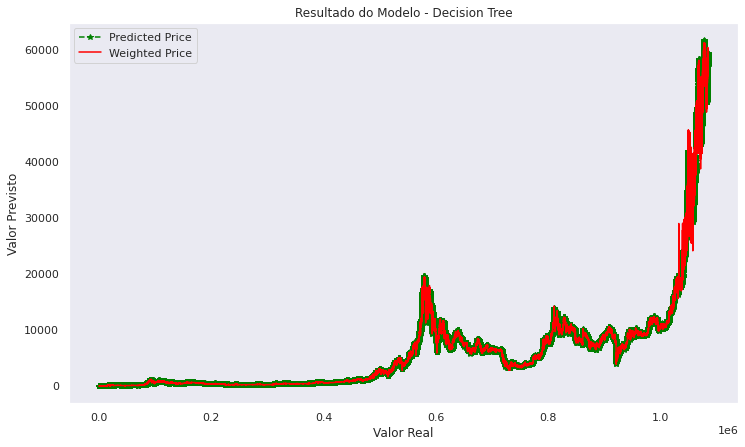


-----------------------------------------------------------------------------------------------------



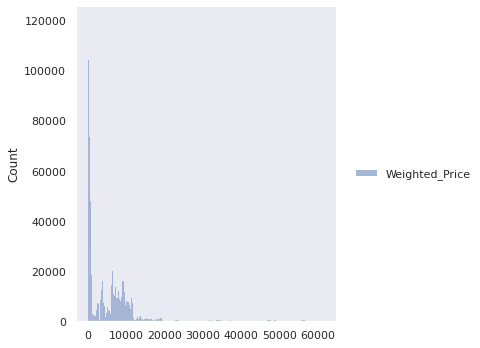

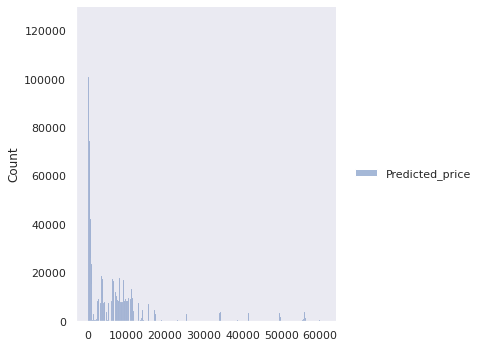


Avaliação do Modelo (Decision Tree)

MAE - Erro Médio Absoluto (Decision Tree): 97.12806356579085
MSE - Erro Quadrático Médio (Decision Tree): 162458.3452375648
RMSE - Raiz Quadrada do Erro Quadrático Médio (Decision Tree): 403.06121772947193
Coeficiente R2 (Decision Tree): 0.9979877778260327
Variância Explicada (Decision Tree): 0.9979877779734005

-----------------------------------------------------------------------------------------------------


ANÁLISE DE RESÍDUOS (Decision Tree)



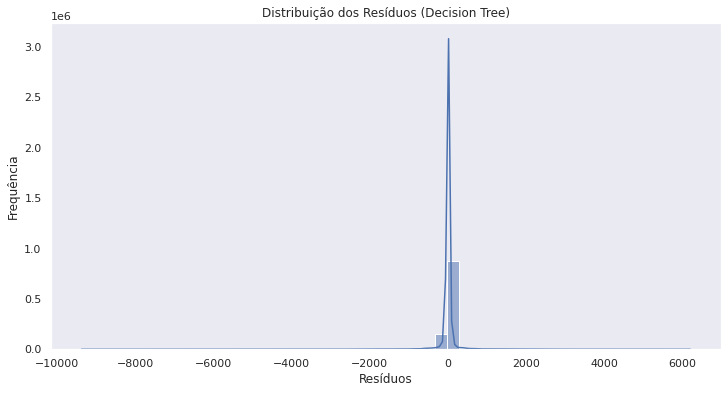

In [56]:
# Cria o modelo de Decision Tree Regressor
modelo_dt_v1 = DecisionTreeRegressor(featuresCol='scaled_features', 
                                     labelCol='Weighted_Price', 
                                     predictionCol='Predicted_price')

# Configuração de hiperparâmetros
paramGrid = ParamGridBuilder() \
    .addGrid(modelo_dt_v1.maxDepth, [5, 10, 15]) \
    .addGrid(modelo_dt_v1.maxBins, [32, 64, 128]) \
    .build()

# Avaliador
evaluator = RegressionEvaluator(labelCol="Weighted_Price", 
                                predictionCol="Predicted_price", 
                                metricName="rmse")

# CrossValidator
cv = CrossValidator(estimator=modelo_dt_v1, 
                    estimatorParamMaps=paramGrid, 
                    evaluator=evaluator, 
                    numFolds=3, 
                    parallelism=2)

# Treinamento com validação cruzada
cvModel = cv.fit(dados_treino_scaled)

# Melhor modelo
best_model_dt = cvModel.bestModel

## Previsões

# Previsões com dados de teste
previsoes_dt_v1 = best_model_dt.transform(dados_teste_scaled)

# Seleciona as colunas
previsoes_dt_v1.select("Predicted_price", "Weighted_Price").show(10)

print('\n-----------------------------------------------------------------------------------------------------\n')

## Avaliações

# Mean Absolute Error
mae_dt_v1 = previsoes_dt_v1.selectExpr("avg(abs(Predicted_price - Weighted_Price)) as mae").collect()[0]["mae"]
print(f"Mean Absolute Error (MAE) nos dados de teste: {mae_dt_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Aplica o avaliador
rmse_dt_v1 = evaluator.evaluate(previsoes_dt_v1)
print(f"Root Mean Squared Error (RMSE) nos dados de teste = {rmse_dt_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Convertendo as previsões para Pandas
Y_dt = previsoes_dt_v1.select('Weighted_Price').toPandas()
_Y_dt = previsoes_dt_v1.select("Predicted_price").toPandas()

# Plot dos valores reais x valores previstos
plt.figure(figsize=(12, 7))
plt.plot(Y_dt, color='green', marker='*', linestyle='dashed', label='Predicted Price')
plt.plot(_Y_dt, color='red', label='Weighted Price')
plt.title('Resultado do Modelo - Decision Tree')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.legend()
plt.show()

print('\n-----------------------------------------------------------------------------------------------------\n')

# Distribuição dos valores reais x valores previstos
sns.set_style("dark")
sns.displot(Y_dt, color="r", label="Valores Reais")
sns.displot(_Y_dt, color="b", label="Valores Previstos")
plt.show()

# Avaliações
mae_dt = mean_absolute_error(Y_dt, _Y_dt)
mse_dt = mean_squared_error(Y_dt, _Y_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(Y_dt, _Y_dt)
evs_dt = explained_variance_score(Y_dt, _Y_dt)

print('\nAvaliação do Modelo (Decision Tree)\n')
print(f'MAE - Erro Médio Absoluto (Decision Tree): {mae_dt}')
print(f'MSE - Erro Quadrático Médio (Decision Tree): {mse_dt}')
print(f'RMSE - Raiz Quadrada do Erro Quadrático Médio (Decision Tree): {rmse_dt}')
print(f'Coeficiente R2 (Decision Tree): {r2_dt}')
print(f'Variância Explicada (Decision Tree): {evs_dt}')

print('\n-----------------------------------------------------------------------------------------------------\n')

# Análise de Resíduos
print('\nANÁLISE DE RESÍDUOS (Decision Tree)\n')

# Calculando os resíduos
residuos_dt = Y_dt['Weighted_Price'] - _Y_dt['Predicted_price']

# Convertendo para DataFrame para facilitar a manipulação
df_residuos_dt = pd.DataFrame({'Weighted_Price': Y_dt['Weighted_Price'], 'Predicted_price': _Y_dt['Predicted_price'], 'Residuo': residuos_dt})

# Histograma dos resíduos
plt.figure(figsize=(12, 6))
sns.histplot(df_residuos_dt['Residuo'], bins=50, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos (Decision Tree)')
plt.show()

In [57]:
# Salvando as Métricas
# Criando um DataFrame para salvar as métricas
modelo_dt_v1_metrics = pd.DataFrame({
    'Nome do Modelo': ['Decision Tree Regressor'],
    'Versao': ['2'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Com Ajuste de Hiperparâmetros'], 
    'MAE': [f"{mae_dt:.2f}"],
    'MSE': [f"{mse_dt:.2f}"],
    'RMSE': [rmse_dt],
    'Coeficiente R2': [r2_dt],
    'Variância Explicada': [evs_dt]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_dt_v1_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Regressão Linear,1,Original,Sem Ajuste de Hiperparâmetros,5.01,127.89,11.308945,0.999998,0.999998
1,Regressão Linear,2,Original,Com Ajuste de Hiperparâmetros,3.37,107.71,10.378583,0.999999,0.999999
2,Decision Tree Regressor,1,Original,Sem Ajuste de Hiperparâmetros,547.42,2628745.11,1621.340529,0.967440,0.967440
3,Decision Tree Regressor,2,Original,Com Ajuste de Hiperparâmetros,97.13,162458.35,403.061218,0.997988,0.997988


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 3 com Random Forest Regressor</span>

<br>

> # Versão 1

- Sem Ajuste de Hiperparâmetros


<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

+-----------------+--------------+
|  Predicted_price|Weighted_Price|
+-----------------+--------------+
|793.1021055611989|          4.39|
|587.1829603644429|          4.58|
|475.0124549973757|           5.0|
|563.4177604763074|          5.32|
|496.8228511607011|          5.29|
|496.4696422954548|          5.29|
|563.4177604763074|          5.19|
|  489.89868822056|  5.3604618117|
|  489.89868822056|   5.777027027|
|574.2467353467672|           6.0|
+-----------------+--------------+
only showing top 10 rows


-----------------------------------------------------------------------------------------------------

Mean Absolute Error (MAE) nos dados de teste: 1156.8009032079947

-----------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE) nos dados de teste = 2134.7376179494577

-----------------------------------------------------------------------------------------------------



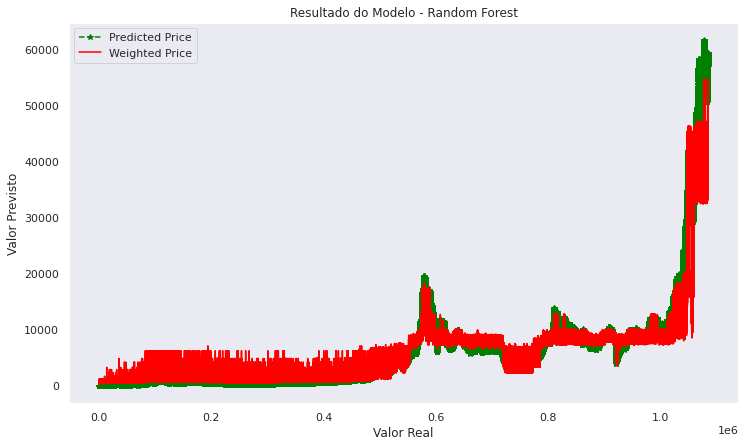


-----------------------------------------------------------------------------------------------------



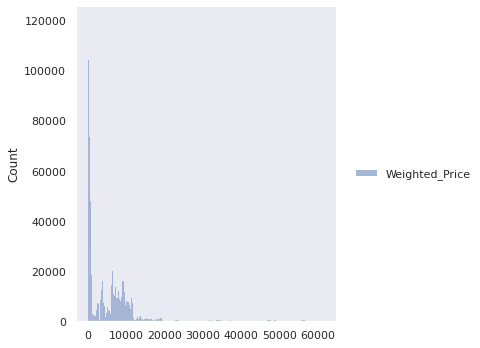

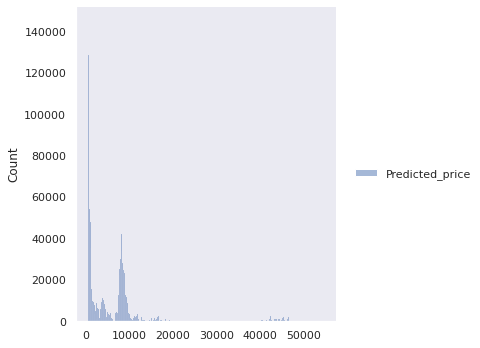


Avaliação do Modelo (Random Forest)

MAE - Erro Médio Absoluto (Random Forest): 1156.8009032079926
MSE - Erro Quadrático Médio (Random Forest): 4557104.697488512
RMSE - Raiz Quadrada do Erro Quadrático Médio (Random Forest): 2134.7376179494545
Coeficiente R2 (Random Forest): 0.9435553334735269
Variância Explicada (Random Forest): 0.9435553353203846

-----------------------------------------------------------------------------------------------------


ANÁLISE DE RESÍDUOS (Random Forest)



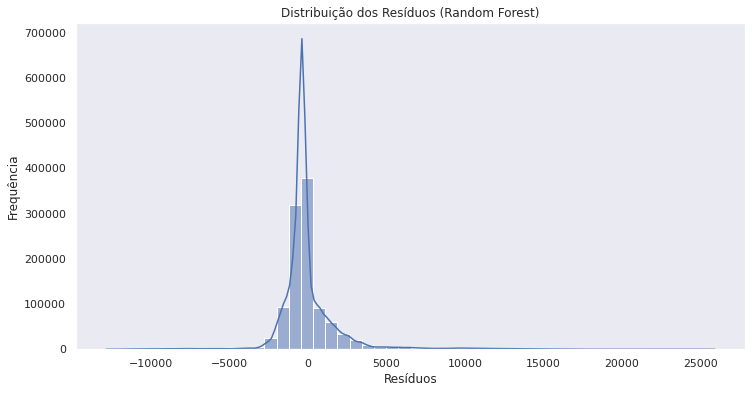

In [58]:
## Criação e Treinamento

# Cria o modelo de Random Forest Regressor
modelo_rf_v1 = RandomForestRegressor(featuresCol='scaled_features', 
                                     labelCol='Weighted_Price', 
                                     predictionCol='Predicted_price', 
                                     numTrees=100)

# Treina o modelo
modelo_rf_v1 = modelo_rf_v1.fit(dados_treino_scaled)

## Previsões

# Previsões com dados de teste
previsoes_rf_v1 = modelo_rf_v1.transform(dados_teste_scaled)

# Seleciona as colunas
previsoes_rf_v1.select("Predicted_price", "Weighted_Price").show(10)

print('\n-----------------------------------------------------------------------------------------------------\n')

## Avaliações

# Mean Absolute Error
mae_rf_v1 = previsoes_rf_v1.selectExpr("avg(abs(Predicted_price - Weighted_Price)) as mae").collect()[0]["mae"]
print(f"Mean Absolute Error (MAE) nos dados de teste: {mae_rf_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Cria um avaliador para o modelo de regressão
evaluator_rf = RegressionEvaluator(labelCol="Weighted_Price", 
                                   predictionCol="Predicted_price", 
                                   metricName="rmse")

# Aplica o avaliador
rmse_rf_v1 = evaluator_rf.evaluate(previsoes_rf_v1)
print(f"Root Mean Squared Error (RMSE) nos dados de teste = {rmse_rf_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Convertendo as previsões para Pandas
Y_rf = previsoes_rf_v1.select('Weighted_Price').toPandas()
_Y_rf = previsoes_rf_v1.select("Predicted_price").toPandas()

# Plot dos valores reais x valores previstos
plt.figure(figsize=(12, 7))
plt.plot(Y_rf, color='green', marker='*', linestyle='dashed', label='Predicted Price')
plt.plot(_Y_rf, color='red', label='Weighted Price')
plt.title('Resultado do Modelo - Random Forest')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.legend()
plt.show()

print('\n-----------------------------------------------------------------------------------------------------\n')

# Distribuição dos valores reais x valores previstos
sns.set_style("dark")
sns.displot(Y_rf, color="r", label="Valores Reais")
sns.displot(_Y_rf, color="b", label="Valores Previstos")
plt.show()

# Avaliações
mae_rf = mean_absolute_error(Y_rf, _Y_rf)
mse_rf = mean_squared_error(Y_rf, _Y_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Y_rf, _Y_rf)
evs_rf = explained_variance_score(Y_rf, _Y_rf)

print('\nAvaliação do Modelo (Random Forest)\n')
print(f'MAE - Erro Médio Absoluto (Random Forest): {mae_rf}')
print(f'MSE - Erro Quadrático Médio (Random Forest): {mse_rf}')
print(f'RMSE - Raiz Quadrada do Erro Quadrático Médio (Random Forest): {rmse_rf}')
print(f'Coeficiente R2 (Random Forest): {r2_rf}')
print(f'Variância Explicada (Random Forest): {evs_rf}')

print('\n-----------------------------------------------------------------------------------------------------\n')

# Análise de Resíduos
print('\nANÁLISE DE RESÍDUOS (Random Forest)\n')

# Calculando os resíduos
residuos_rf = Y_rf['Weighted_Price'] - _Y_rf['Predicted_price']

# Convertendo para DataFrame para facilitar a manipulação
df_residuos_rf = pd.DataFrame({'Weighted_Price': Y_rf['Weighted_Price'], 'Predicted_price': _Y_rf['Predicted_price'], 'Residuo': residuos_rf})

# Histograma dos resíduos
plt.figure(figsize=(12, 6))
sns.histplot(df_residuos_rf['Residuo'], bins=50, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos (Random Forest)')
plt.show()

<br>

### Salvando as Métricas

In [59]:
# Criando um DataFrame para salvar as métricas
modelo_rf_v1_metrics = pd.DataFrame({
    'Nome do Modelo': ['Random Forest Regressor'],
    'Versao': ['1'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Sem Ajuste de Hiperparâmetros'], 
    'MAE': [f"{mae_rf:.2f}"],
    'MSE': [f"{mse_rf:.2f}"],
    'RMSE': [rmse_rf],
    'Coeficiente R2': [r2_rf],
    'Variância Explicada': [evs_rf]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_rf_v1_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Regressão Linear,1,Original,Sem Ajuste de Hiperparâmetros,5.01,127.89,11.308945,0.999998,0.999998
1,Regressão Linear,2,Original,Com Ajuste de Hiperparâmetros,3.37,107.71,10.378583,0.999999,0.999999
2,Decision Tree Regressor,1,Original,Sem Ajuste de Hiperparâmetros,547.42,2628745.11,1621.340529,0.967440,0.967440
3,Decision Tree Regressor,2,Original,Com Ajuste de Hiperparâmetros,97.13,162458.35,403.061218,0.997988,0.997988
4,Random Forest Regressor,1,Original,Sem Ajuste de Hiperparâmetros,1156.80,4557104.70,2134.737618,0.943555,0.943555


<br>

> # Versão 2

- Com Ajuste de Hiperparâmetros

<br>


### Configurando Hiperparâmetros

+------------------+--------------+
|   Predicted_price|Weighted_Price|
+------------------+--------------+
| 267.8056834303929|          4.39|
| 71.05494896779693|          4.58|
| 43.41696281235625|           5.0|
|54.159608038262355|          5.32|
|156.13336633599397|          5.29|
| 90.83166866692024|          5.29|
|54.159608038262355|          5.19|
| 76.28036908063937|  5.3604618117|
| 80.07954557146851|   5.777027027|
| 44.17220694718668|           6.0|
+------------------+--------------+
only showing top 10 rows


-----------------------------------------------------------------------------------------------------

Mean Absolute Error (MAE) nos dados de teste: 443.5822450231281

-----------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE) nos dados de teste = 1358.1004412639224

-----------------------------------------------------------------------------------------------------



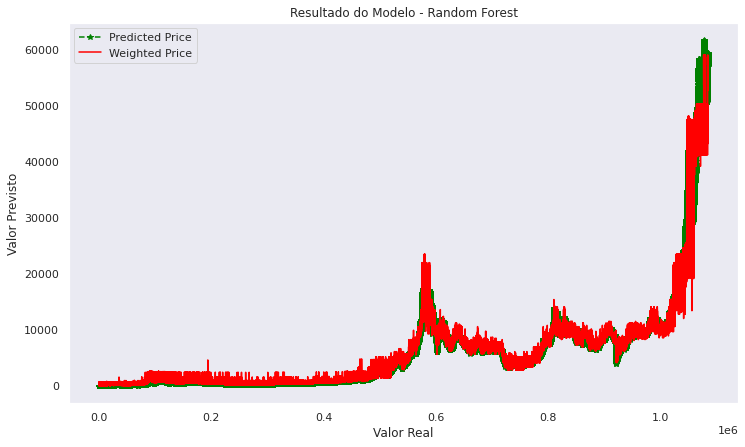


-----------------------------------------------------------------------------------------------------



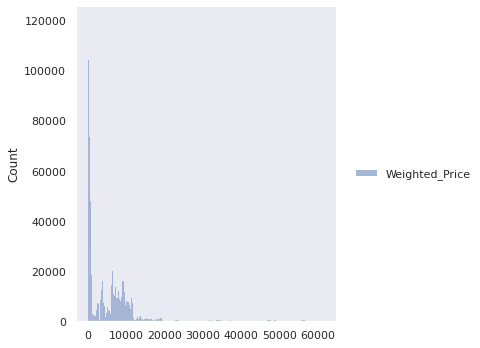

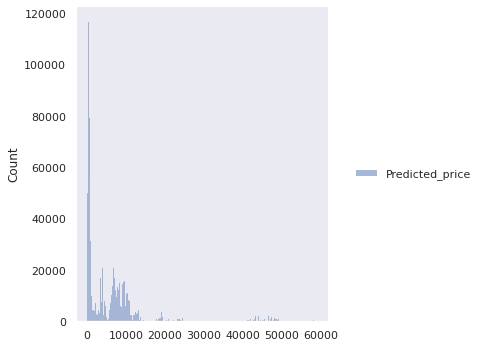


Avaliação do Modelo (Random Forest)

MAE - Erro Médio Absoluto (Random Forest): 443.5822450231278
MSE - Erro Quadrático Médio (Random Forest): 1844436.8085612573
RMSE - Raiz Quadrada do Erro Quadrático Médio (Random Forest): 1358.100441263921
Coeficiente R2 (Random Forest): 0.9771546568491682
Variância Explicada (Random Forest): 0.977154664965009

-----------------------------------------------------------------------------------------------------


ANÁLISE DE RESÍDUOS (Random Forest)



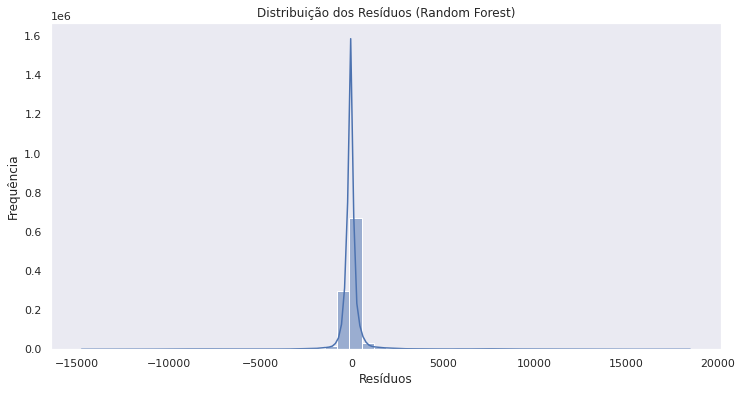

In [60]:
# Cria o modelo de Random Forest Regressor
modelo_rf_v1 = RandomForestRegressor(featuresCol='scaled_features', 
                                     labelCol='Weighted_Price', 
                                     predictionCol='Predicted_price')

# Configuração de hiperparâmetros
paramGrid = ParamGridBuilder() \
    .addGrid(modelo_rf_v1.numTrees, [50, 100, 150]) \
    .addGrid(modelo_rf_v1.maxDepth, [5, 10, 15]) \
    .build()

# Avaliador
evaluator = RegressionEvaluator(labelCol="Weighted_Price", 
                                predictionCol="Predicted_price", 
                                metricName="rmse")

# CrossValidator
cv = CrossValidator(estimator=modelo_rf_v1, 
                    estimatorParamMaps=paramGrid, 
                    evaluator=evaluator, 
                    numFolds=3, 
                    parallelism=2)

# Treinamento com validação cruzada
cvModel = cv.fit(dados_treino_scaled)

# Melhor modelo
best_model_rf = cvModel.bestModel

## Previsões

# Previsões com dados de teste
previsoes_rf_v1 = best_model_rf.transform(dados_teste_scaled)

# Seleciona as colunas
previsoes_rf_v1.select("Predicted_price", "Weighted_Price").show(10)

print('\n-----------------------------------------------------------------------------------------------------\n')

## Avaliações

# Mean Absolute Error
mae_rf_v1 = previsoes_rf_v1.selectExpr("avg(abs(Predicted_price - Weighted_Price)) as mae").collect()[0]["mae"]
print(f"Mean Absolute Error (MAE) nos dados de teste: {mae_rf_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Aplica o avaliador
rmse_rf_v1 = evaluator.evaluate(previsoes_rf_v1)
print(f"Root Mean Squared Error (RMSE) nos dados de teste = {rmse_rf_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Convertendo as previsões para Pandas
Y_rf = previsoes_rf_v1.select('Weighted_Price').toPandas()
_Y_rf = previsoes_rf_v1.select("Predicted_price").toPandas()

# Plot dos valores reais x valores previstos
plt.figure(figsize=(12, 7))
plt.plot(Y_rf, color='green', marker='*', linestyle='dashed', label='Predicted Price')
plt.plot(_Y_rf, color='red', label='Weighted Price')
plt.title('Resultado do Modelo - Random Forest')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.legend()
plt.show()

print('\n-----------------------------------------------------------------------------------------------------\n')

# Distribuição dos valores reais x valores previstos
sns.set_style("dark")
sns.displot(Y_rf, color="r", label="Valores Reais")
sns.displot(_Y_rf, color="b", label="Valores Previstos")
plt.show()

# Avaliações
mae_rf = mean_absolute_error(Y_rf, _Y_rf)
mse_rf = mean_squared_error(Y_rf, _Y_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Y_rf, _Y_rf)
evs_rf = explained_variance_score(Y_rf, _Y_rf)

print('\nAvaliação do Modelo (Random Forest)\n')
print(f'MAE - Erro Médio Absoluto (Random Forest): {mae_rf}')
print(f'MSE - Erro Quadrático Médio (Random Forest): {mse_rf}')
print(f'RMSE - Raiz Quadrada do Erro Quadrático Médio (Random Forest): {rmse_rf}')
print(f'Coeficiente R2 (Random Forest): {r2_rf}')
print(f'Variância Explicada (Random Forest): {evs_rf}')

print('\n-----------------------------------------------------------------------------------------------------\n')

# Análise de Resíduos
print('\nANÁLISE DE RESÍDUOS (Random Forest)\n')

# Calculando os resíduos
residuos_rf = Y_rf['Weighted_Price'] - _Y_rf['Predicted_price']

# Convertendo para DataFrame para facilitar a manipulação
df_residuos_rf = pd.DataFrame({'Weighted_Price': Y_rf['Weighted_Price'], 'Predicted_price': _Y_rf['Predicted_price'], 'Residuo': residuos_rf})

# Histograma dos resíduos
plt.figure(figsize=(12, 6))
sns.histplot(df_residuos_rf['Residuo'], bins=50, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos (Random Forest)')
plt.show()

In [61]:
# Salvando as Métricas
# Criando um DataFrame para salvar as métricas
modelo_rf_v1_metrics = pd.DataFrame({
    'Nome do Modelo': ['Random Forest Regressor'],
    'Versao': ['2'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Com Ajuste de Hiperparâmetros'], 
    'MAE': [f"{mae_rf:.2f}"],
    'MSE': [f"{mse_rf:.2f}"],
    'RMSE': [rmse_rf],
    'Coeficiente R2': [r2_rf],
    'Variância Explicada': [evs_rf]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_rf_v1_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Regressão Linear,1,Original,Sem Ajuste de Hiperparâmetros,5.01,127.89,11.308945,0.999998,0.999998
1,Regressão Linear,2,Original,Com Ajuste de Hiperparâmetros,3.37,107.71,10.378583,0.999999,0.999999
2,Decision Tree Regressor,1,Original,Sem Ajuste de Hiperparâmetros,547.42,2628745.11,1621.340529,0.967440,0.967440
3,Decision Tree Regressor,2,Original,Com Ajuste de Hiperparâmetros,97.13,162458.35,403.061218,0.997988,0.997988
4,Random Forest Regressor,1,Original,Sem Ajuste de Hiperparâmetros,1156.80,4557104.70,2134.737618,0.943555,0.943555
5,Random Forest Regressor,2,Original,Com Ajuste de Hiperparâmetros,443.58,1844436.81,1358.100441,0.977155,0.977155


<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 4 com Gradient Boosted Tree Regressor</span>

<br>

> # Versão 1

- Sem Ajuste de Hiperparâmetros


<br>

### Criação, Treinamento, Previsão e Avaliação do Modelo

+------------------+--------------+
|   Predicted_price|Weighted_Price|
+------------------+--------------+
|  74.8442714749919|          4.39|
| 62.18814258525042|          4.58|
| 23.14375906711632|           5.0|
| 54.68834935593783|          5.32|
| 18.96622178999857|          5.29|
|28.215096670460753|          5.29|
| 50.24127930452768|          5.19|
| 27.66754926094177|  5.3604618117|
| 27.66754926094177|   5.777027027|
| 54.68834935593783|           6.0|
+------------------+--------------+
only showing top 10 rows


-----------------------------------------------------------------------------------------------------

Mean Absolute Error (MAE) nos dados de teste: 319.6021761871417

-----------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE) nos dados de teste = 1110.2243309238324

-----------------------------------------------------------------------------------------------------



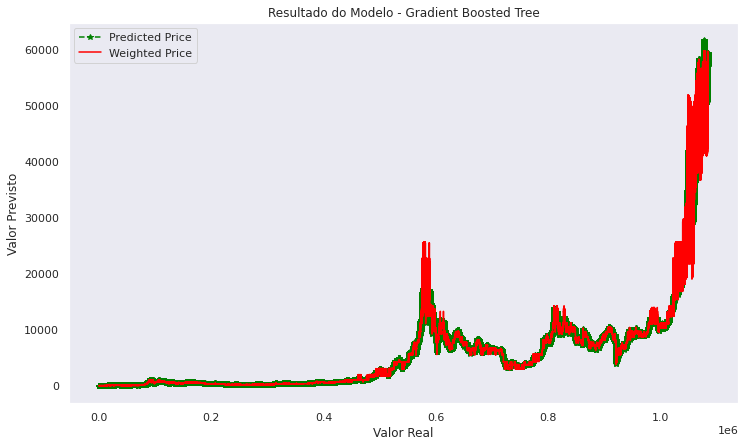


-----------------------------------------------------------------------------------------------------



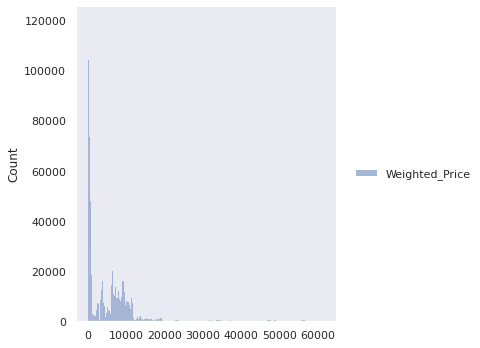

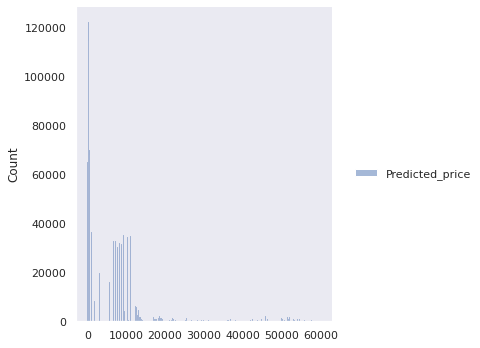


Avaliação do Modelo (Gradient Boosted Tree)

MAE - Erro Médio Absoluto (Gradient Boosted Tree): 319.6021761871418
MSE - Erro Quadrático Médio (Gradient Boosted Tree): 1232598.064975273
RMSE - Raiz Quadrada do Erro Quadrático Médio (Gradient Boosted Tree): 1110.2243309238331
Coeficiente R2 (Gradient Boosted Tree): 0.9847329409006012
Variância Explicada (Gradient Boosted Tree): 0.9847329726238888

-----------------------------------------------------------------------------------------------------


ANÁLISE DE RESÍDUOS (Gradient Boosted Tree)



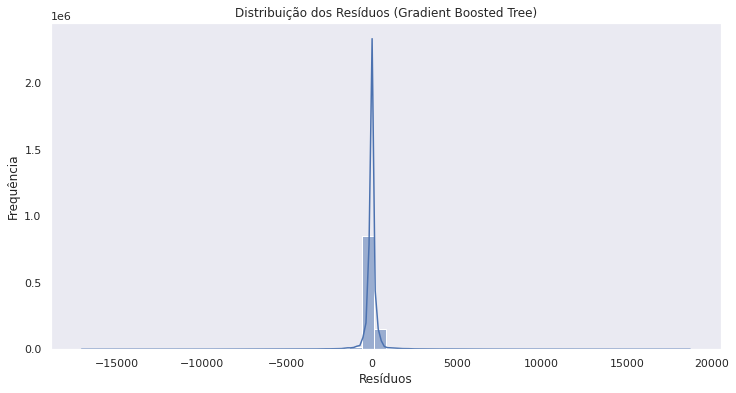

In [62]:
## Criação e Treinamento

# Cria o modelo de Gradient Boosted Tree Regressor
modelo_gbt_v1 = GBTRegressor(featuresCol='scaled_features', 
                             labelCol='Weighted_Price', 
                             predictionCol='Predicted_price', 
                             maxIter=100)

# Treina o modelo
modelo_gbt_v1 = modelo_gbt_v1.fit(dados_treino_scaled)

## Previsões

# Previsões com dados de teste
previsoes_gbt_v1 = modelo_gbt_v1.transform(dados_teste_scaled)

# Seleciona as colunas
previsoes_gbt_v1.select("Predicted_price", "Weighted_Price").show(10)

print('\n-----------------------------------------------------------------------------------------------------\n')

## Avaliações

# Mean Absolute Error
mae_gbt_v1 = previsoes_gbt_v1.selectExpr("avg(abs(Predicted_price - Weighted_Price)) as mae").collect()[0]["mae"]
print(f"Mean Absolute Error (MAE) nos dados de teste: {mae_gbt_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Cria um avaliador para o modelo de regressão
evaluator_gbt = RegressionEvaluator(labelCol="Weighted_Price", 
                                    predictionCol="Predicted_price", 
                                    metricName="rmse")

# Aplica o avaliador
rmse_gbt_v1 = evaluator_gbt.evaluate(previsoes_gbt_v1)
print(f"Root Mean Squared Error (RMSE) nos dados de teste = {rmse_gbt_v1}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Convertendo as previsões para Pandas
Y_gbt = previsoes_gbt_v1.select('Weighted_Price').toPandas()
_Y_gbt = previsoes_gbt_v1.select("Predicted_price").toPandas()

# Plot dos valores reais x valores previstos
plt.figure(figsize=(12, 7))
plt.plot(Y_gbt, color='green', marker='*', linestyle='dashed', label='Predicted Price')
plt.plot(_Y_gbt, color='red', label='Weighted Price')
plt.title('Resultado do Modelo - Gradient Boosted Tree')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.legend()
plt.show()

print('\n-----------------------------------------------------------------------------------------------------\n')

# Distribuição dos valores reais x valores previstos
sns.set_style("dark")
sns.displot(Y_gbt, color="r", label="Valores Reais")
sns.displot(_Y_gbt, color="b", label="Valores Previstos")
plt.show()

# Avaliações
mae_gbt = mean_absolute_error(Y_gbt, _Y_gbt)
mse_gbt = mean_squared_error(Y_gbt, _Y_gbt)
rmse_gbt = np.sqrt(mse_gbt)
r2_gbt = r2_score(Y_gbt, _Y_gbt)
evs_gbt = explained_variance_score(Y_gbt, _Y_gbt)

print('\nAvaliação do Modelo (Gradient Boosted Tree)\n')
print(f'MAE - Erro Médio Absoluto (Gradient Boosted Tree): {mae_gbt}')
print(f'MSE - Erro Quadrático Médio (Gradient Boosted Tree): {mse_gbt}')
print(f'RMSE - Raiz Quadrada do Erro Quadrático Médio (Gradient Boosted Tree): {rmse_gbt}')
print(f'Coeficiente R2 (Gradient Boosted Tree): {r2_gbt}')
print(f'Variância Explicada (Gradient Boosted Tree): {evs_gbt}')

print('\n-----------------------------------------------------------------------------------------------------\n')

# Análise de Resíduos
print('\nANÁLISE DE RESÍDUOS (Gradient Boosted Tree)\n')

# Calculando os resíduos
residuos_gbt = Y_gbt['Weighted_Price'] - _Y_gbt['Predicted_price']

# Convertendo para DataFrame para facilitar a manipulação
df_residuos_gbt = pd.DataFrame({'Weighted_Price': Y_gbt['Weighted_Price'], 'Predicted_price': _Y_gbt['Predicted_price'], 'Residuo': residuos_gbt})

# Histograma dos resíduos
plt.figure(figsize=(12, 6))
sns.histplot(df_residuos_gbt['Residuo'], bins=50, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos (Gradient Boosted Tree)')
plt.show()

<br>

### Salvando as Métricas

In [63]:
# Criando um DataFrame para salvar as métricas
modelo_gbt_v1_metrics = pd.DataFrame({
    'Nome do Modelo': ['Gradient Boosted Tree Regressor'],
    'Versao': ['1'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Sem Ajuste de Hiperparâmetros'], 
    'MAE': [f"{mae_gbt:.2f}"],
    'MSE': [f"{mse_gbt:.2f}"],
    'RMSE': [rmse_gbt],
    'Coeficiente R2': [r2_gbt],
    'Variância Explicada': [evs_gbt]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_gbt_v1_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Regressão Linear,1,Original,Sem Ajuste de Hiperparâmetros,5.01,127.89,11.308945,0.999998,0.999998
1,Regressão Linear,2,Original,Com Ajuste de Hiperparâmetros,3.37,107.71,10.378583,0.999999,0.999999
2,Decision Tree Regressor,1,Original,Sem Ajuste de Hiperparâmetros,547.42,2628745.11,1621.340529,0.967440,0.967440
3,Decision Tree Regressor,2,Original,Com Ajuste de Hiperparâmetros,97.13,162458.35,403.061218,0.997988,0.997988
4,Random Forest Regressor,1,Original,Sem Ajuste de Hiperparâmetros,1156.80,4557104.70,2134.737618,0.943555,0.943555
5,Random Forest Regressor,2,Original,Com Ajuste de Hiperparâmetros,443.58,1844436.81,1358.100441,0.977155,0.977155
6,Gradient Boosted Tree Regressor,1,Original,Sem Ajuste de Hiperparâmetros,319.60,1232598.06,1110.224331,0.984733,0.984733


<br>

> # Versão 2

- Com Ajuste de Hiperparâmetros

<br>


### Configurando Hiperparâmetros

+------------------+--------------+
|   Predicted_price|Weighted_Price|
+------------------+--------------+
|14.086950832265485|          4.39|
| 6.749375808526144|          4.58|
| 4.988377452591403|           5.0|
| 4.870596359928816|          5.32|
| 5.271113240934576|          5.29|
|5.0802136667773015|          5.29|
|4.9567044719626345|          5.19|
| 4.900863086096902|  5.3604618117|
| 6.282106716050965|   5.777027027|
| 4.870596359928816|           6.0|
+------------------+--------------+
only showing top 10 rows


-----------------------------------------------------------------------------------------------------

Mean Absolute Error (MAE) nos dados de teste: 294.85109696226993

-----------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE) nos dados de teste = 1098.2069149769493

-----------------------------------------------------------------------------------------------------



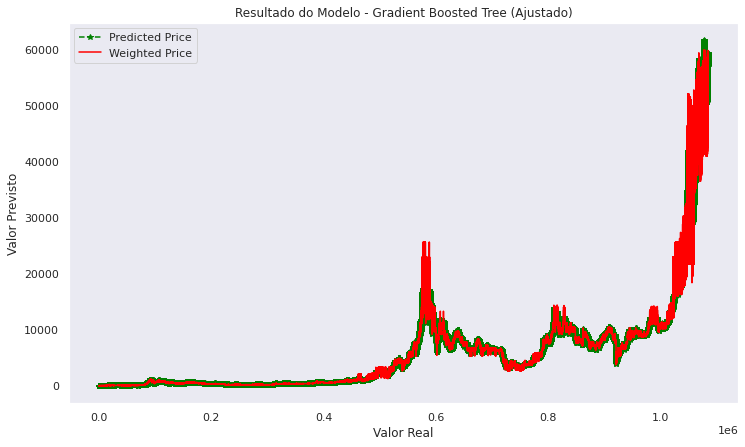


-----------------------------------------------------------------------------------------------------



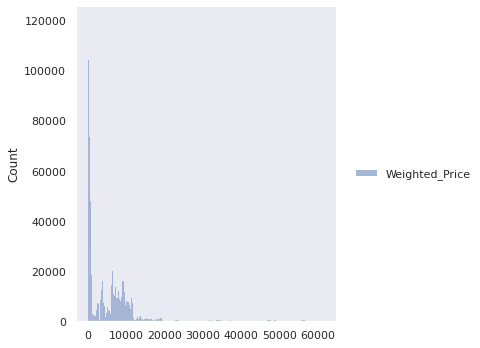

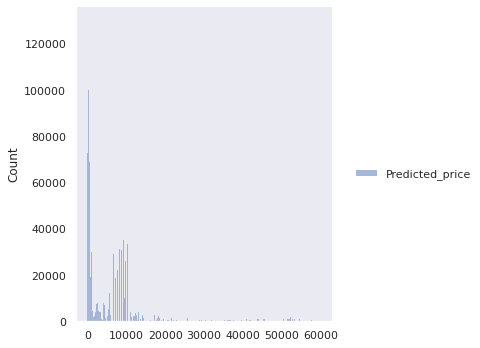


Avaliação do Modelo (Gradient Boosted Tree - Ajustado)

MAE - Erro Médio Absoluto (Gradient Boosted Tree - Ajustado): 294.8510969622699
MSE - Erro Quadrático Médio (Gradient Boosted Tree - Ajustado): 1206058.4281031757
RMSE - Raiz Quadrada do Erro Quadrático Médio (Gradient Boosted Tree - Ajustado): 1098.2069149769436
Coeficiente R2 (Gradient Boosted Tree - Ajustado): 0.9850616629845604
Variância Explicada (Gradient Boosted Tree - Ajustado): 0.9850616830596022

-----------------------------------------------------------------------------------------------------


ANÁLISE DE RESÍDUOS (Gradient Boosted Tree - Ajustado)



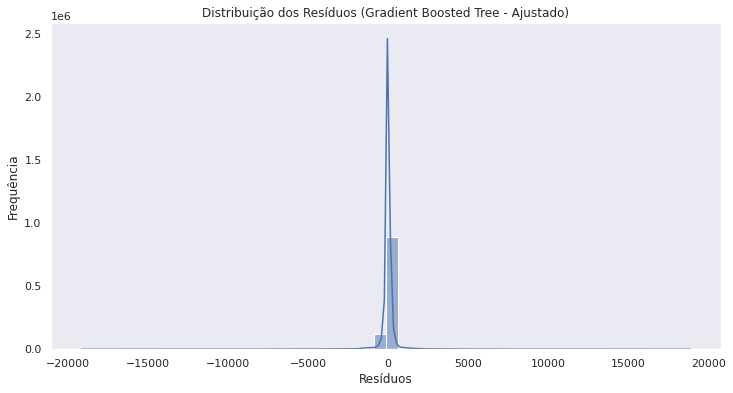

In [64]:
# Cria o modelo de Gradient Boosted Tree Regressor
modelo_gbt_v2 = GBTRegressor(featuresCol='scaled_features', 
                             labelCol='Weighted_Price', 
                             predictionCol='Predicted_price')

# Configuração de hiperparâmetros
paramGrid = ParamGridBuilder() \
    .addGrid(modelo_gbt_v2.maxDepth, [5, 10, 15]) \
    .addGrid(modelo_gbt_v2.maxIter, [50, 100, 150]) \
    .build()

# Avaliador
evaluator_gbt = RegressionEvaluator(labelCol="Weighted_Price", 
                                    predictionCol="Predicted_price", 
                                    metricName="rmse")

# CrossValidator
cv = CrossValidator(estimator=modelo_gbt_v2, 
                    estimatorParamMaps=paramGrid, 
                    evaluator=evaluator_gbt, 
                    numFolds=3, 
                    parallelism=2)

# Treinamento com validação cruzada
cvModel_gbt = cv.fit(dados_treino_scaled)

# Melhor modelo
best_model_gbt = cvModel_gbt.bestModel

## Previsões

# Previsões com dados de teste
previsoes_gbt_v2 = best_model_gbt.transform(dados_teste_scaled)

# Seleciona as colunas
previsoes_gbt_v2.select("Predicted_price", "Weighted_Price").show(10)

print('\n-----------------------------------------------------------------------------------------------------\n')

## Avaliações

# Mean Absolute Error
mae_gbt_v2 = previsoes_gbt_v2.selectExpr("avg(abs(Predicted_price - Weighted_Price)) as mae").collect()[0]["mae"]
print(f"Mean Absolute Error (MAE) nos dados de teste: {mae_gbt_v2}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Aplica o avaliador
rmse_gbt_v2 = evaluator_gbt.evaluate(previsoes_gbt_v2)
print(f"Root Mean Squared Error (RMSE) nos dados de teste = {rmse_gbt_v2}")

print('\n-----------------------------------------------------------------------------------------------------\n')

# Convertendo as previsões para Pandas
Y_gbt_v2 = previsoes_gbt_v2.select('Weighted_Price').toPandas()
_Y_gbt_v2 = previsoes_gbt_v2.select("Predicted_price").toPandas()

# Plot dos valores reais x valores previstos
plt.figure(figsize=(12, 7))
plt.plot(Y_gbt_v2, color='green', marker='*', linestyle='dashed', label='Predicted Price')
plt.plot(_Y_gbt_v2, color='red', label='Weighted Price')
plt.title('Resultado do Modelo - Gradient Boosted Tree (Ajustado)')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.legend()
plt.show()

print('\n-----------------------------------------------------------------------------------------------------\n')

# Distribuição dos valores reais x valores previstos
sns.set_style("dark")
sns.displot(Y_gbt_v2, color="r", label="Valores Reais")
sns.displot(_Y_gbt_v2, color="b", label="Valores Previstos")
plt.show()

# Avaliações
mae_gbt_v2 = mean_absolute_error(Y_gbt_v2, _Y_gbt_v2)
mse_gbt_v2 = mean_squared_error(Y_gbt_v2, _Y_gbt_v2)
rmse_gbt_v2 = np.sqrt(mse_gbt_v2)
r2_gbt_v2 = r2_score(Y_gbt_v2, _Y_gbt_v2)
evs_gbt_v2 = explained_variance_score(Y_gbt_v2, _Y_gbt_v2)

print('\nAvaliação do Modelo (Gradient Boosted Tree - Ajustado)\n')
print(f'MAE - Erro Médio Absoluto (Gradient Boosted Tree - Ajustado): {mae_gbt_v2}')
print(f'MSE - Erro Quadrático Médio (Gradient Boosted Tree - Ajustado): {mse_gbt_v2}')
print(f'RMSE - Raiz Quadrada do Erro Quadrático Médio (Gradient Boosted Tree - Ajustado): {rmse_gbt_v2}')
print(f'Coeficiente R2 (Gradient Boosted Tree - Ajustado): {r2_gbt_v2}')
print(f'Variância Explicada (Gradient Boosted Tree - Ajustado): {evs_gbt_v2}')

print('\n-----------------------------------------------------------------------------------------------------\n')

# Análise de Resíduos
print('\nANÁLISE DE RESÍDUOS (Gradient Boosted Tree - Ajustado)\n')

# Calculando os resíduos
residuos_gbt_v2 = Y_gbt_v2['Weighted_Price'] - _Y_gbt_v2['Predicted_price']

# Convertendo para DataFrame para facilitar a manipulação
df_residuos_gbt_v2 = pd.DataFrame({'Weighted_Price': Y_gbt_v2['Weighted_Price'], 'Predicted_price': _Y_gbt_v2['Predicted_price'], 'Residuo': residuos_gbt_v2})

# Histograma dos resíduos
plt.figure(figsize=(12, 6))
sns.histplot(df_residuos_gbt_v2['Residuo'], bins=50, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos (Gradient Boosted Tree - Ajustado)')
plt.show()

In [65]:
# Salvando as Métricas
# Criando um DataFrame para salvar as métricas
modelo_gbt_v2_metrics = pd.DataFrame({
    'Nome do Modelo': ['Gradient Boosted Tree Regressor'],
    'Versao': ['2'],
    'Tipo de Dados': ['Original'],
    'Tipo de Modelo': ['Com Ajuste de Hiperparâmetros'], 
    'MAE': [f"{mae_gbt_v2:.2f}"],
    'MSE': [f"{mse_gbt_v2:.2f}"],
    'RMSE': [rmse_gbt_v2],
    'Coeficiente R2': [r2_gbt_v2],
    'Variância Explicada': [evs_gbt_v2]
})

# Concatenando com o DataFrame existente
df_modelos = pd.concat([df_modelos, modelo_gbt_v2_metrics], ignore_index=True)

# Visualizando DataFrame
display(df_modelos)

,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Regressão Linear,1,Original,Sem Ajuste de Hiperparâmetros,5.01,127.89,11.308945,0.999998,0.999998
1,Regressão Linear,2,Original,Com Ajuste de Hiperparâmetros,3.37,107.71,10.378583,0.999999,0.999999
2,Decision Tree Regressor,1,Original,Sem Ajuste de Hiperparâmetros,547.42,2628745.11,1621.340529,0.967440,0.967440
3,Decision Tree Regressor,2,Original,Com Ajuste de Hiperparâmetros,97.13,162458.35,403.061218,0.997988,0.997988
4,Random Forest Regressor,1,Original,Sem Ajuste de Hiperparâmetros,1156.80,4557104.70,2134.737618,0.943555,0.943555
5,Random Forest Regressor,2,Original,Com Ajuste de Hiperparâmetros,443.58,1844436.81,1358.100441,0.977155,0.977155
6,Gradient Boosted Tree Regressor,1,Original,Sem Ajuste de Hiperparâmetros,319.60,1232598.06,1110.224331,0.984733,0.984733
7,Gradient Boosted Tree Regressor,2,Original,Com Ajuste de Hiperparâmetros,294.85,1206058.43,1098.206915,0.985062,0.985062


<br><br>

# SELECIONANDO O MELHOR MODELO

- Usaremos o modelo que .

<br>

#### Visualizando Dataframe Ordenado

In [66]:
# Ordenando o DataFrame pelo (modificar sort_values)
df_modelos_sorted = df_modelos.sort_values(by='RMSE', ascending=True).reset_index(drop=True)

# Visualizando Daframe
display(df_modelos_sorted)

,Nome do Modelo,Versao,Tipo de Dados,Tipo de Modelo,MAE,MSE,RMSE,Coeficiente R2,Variância Explicada
0,Regressão Linear,2,Original,Com Ajuste de Hiperparâmetros,3.37,107.71,10.378583,0.999999,0.999999
1,Regressão Linear,1,Original,Sem Ajuste de Hiperparâmetros,5.01,127.89,11.308945,0.999998,0.999998
2,Decision Tree Regressor,2,Original,Com Ajuste de Hiperparâmetros,97.13,162458.35,403.061218,0.997988,0.997988
3,Gradient Boosted Tree Regressor,2,Original,Com Ajuste de Hiperparâmetros,294.85,1206058.43,1098.206915,0.985062,0.985062
4,Gradient Boosted Tree Regressor,1,Original,Sem Ajuste de Hiperparâmetros,319.60,1232598.06,1110.224331,0.984733,0.984733
5,Random Forest Regressor,2,Original,Com Ajuste de Hiperparâmetros,443.58,1844436.81,1358.100441,0.977155,0.977155
6,Decision Tree Regressor,1,Original,Sem Ajuste de Hiperparâmetros,547.42,2628745.11,1621.340529,0.967440,0.967440
7,Random Forest Regressor,1,Original,Sem Ajuste de Hiperparâmetros,1156.80,4557104.70,2134.737618,0.943555,0.943555


In [67]:
melhor_modelo = df_modelos.nsmallest(1, 'RMSE').iloc[0]

# Visualizando dados do melhor modelo
print("Melhor modelo selecionado:")
display(melhor_modelo)

Melhor modelo selecionado:


Nome do Modelo                      Regressão Linear
Versao                                             2
Tipo de Dados                               Original
Tipo de Modelo         Com Ajuste de Hiperparâmetros
MAE                                             3.37
MSE                                           107.71
RMSE                                       10.378583
Coeficiente R2                              0.999999
Variância Explicada                         0.999999
Name: 1, dtype: object

<br><br>

# Salvando Pipeline com Escalas e Melhor Modelo

In [93]:
# Salvar o pipeline
pipeline_model.write().overwrite().save('pipeline_e_modelo/pipeline_model_scale')

# Salvar o melhor modelo
modelo_v2.write().overwrite().save('pipeline_e_modelo/best_model')

# Salvando o Pipeline Vector
pipeline_model_vector.write().overwrite().save("pipeline_e_modelo/pipeline_model_vector")

# Salvar as colunas dos dados de treino
X_treino_columns = dados_treino_scaled.columns
joblib.dump(X_treino_columns, 'pipeline_e_modelo/X_treino_columns.pkl')

print('Pipeline, vector, modelo e colunas dos dados de treino salvos com sucesso.')

Pipeline, vector, modelo e colunas dos dados de treino salvos com sucesso.


In [92]:
# Diretório onde os arquivos serão salvos
save_dir = 'pipeline_e_modelo/'

# 1. Salvar o pipeline de transformação
pipeline_model.write().overwrite().save(save_dir + 'pipeline_model_scale')

# 2. Salvar o modelo treinado
best_model.write().overwrite().save(save_dir + 'best_model')

# Salvando o Pipeline Vector
pipeline_model_vector.write().overwrite().save(save_dir + 'pipeline_model_vector')

# 3. Salvar as colunas dos dados de treino
X_treino_columns = dados_treino_scaled.columns
joblib.dump(X_treino_columns, save_dir + 'X_treino_columns.pkl')

# Compactar os arquivos em um único arquivo ZIP
with zipfile.ZipFile('pipeline_e_modelo.zip', 'w') as zipf:
    zipf.write(save_dir + 'pipeline_model_scale')
    zipf.write(save_dir + 'best_model')
    zipf.write(save_dir + 'pipeline_model_vector')
    zipf.write(save_dir + 'X_treino_columns.pkl')

print('Pipeline, vector, modelo e colunas dos dados de treino salvos e compactados com sucesso.')

Pipeline, vector, modelo e colunas dos dados de treino salvos e compactados com sucesso.


<br><br>

# Carregando Modelo e Pipeline Salvos

In [1]:
# Carregar o pipeline
pipeline_model = PipelineModel.load('pipeline_e_modelo/pipeline_model_scale')

# Carrega o vector
pipeline_vector = PipelineModel.load('pipeline_e_modelo/pipeline_model_vector')

# Carregar o melhor modelo
best_model = LinearRegressionModel.load('pipeline_e_modelo/best_model')

# Carregar as colunas dos dados de treino
X_treino_columns = joblib.load('pipeline_e_modelo/X_treino_columns.pkl')

print('Pipeline, vector, modelo e colunas dos dados de treino carregados com sucesso.')

NameError: name 'PipelineModel' is not defined

In [96]:
# Diretório onde os arquivos serão extraídos
extract_dir = 'pipeline_e_modelo/'

# Descompactar o arquivo ZIP
with zipfile.ZipFile('pipeline_e_modelo.zip', 'r') as zipf:
    zipf.extractall(extract_dir)

# 1. Carregar o pipeline de transformação
pipeline_model = PipelineModel.load(extract_dir + 'pipeline_model_scale')

# 2. Carregar o pipeline de vector
pipeline_vector = PipelineModel.load(extract_dir + 'pipeline_model_vector')

# 3. Carregar o modelo treinado (substitua 'LinearRegressionModel' pelo seu modelo específico)
best_model = LinearRegressionModel.load(extract_dir + 'best_model')

# 4. Carregar as colunas dos dados de treino
X_treino_columns = joblib.load(extract_dir + 'X_treino_columns.pkl')

print('Pipeline, vector, modelo e colunas dos dados de treino carregados com sucesso.')

Pipeline, vector, modelo e colunas dos dados de treino carregados com sucesso.


In [109]:
# Diretório onde os arquivos serão extraídos
extract_dir = 'pipeline_e_modelo/'

# Descompactar o arquivo ZIP
with zipfile.ZipFile('pipeline_e_modelo.zip', 'r') as zipf:
    zipf.extractall(extract_dir)

# 1. Carregar o pipeline de transformação
pipeline_model = PipelineModel.load(extract_dir + 'pipeline_model_scale')

# 2. Carregar o pipeline de vector
pipeline_vector = PipelineModel.load(extract_dir + 'pipeline_model_vector')

# 3. Carregar o modelo treinado (substitua 'LinearRegressionModel' pelo seu modelo específico)
best_model = LinearRegressionModel.load(extract_dir + 'best_model')

# 4. Carregar as colunas dos dados de treino
X_treino_columns = joblib.load(extract_dir + 'X_treino_columns.pkl')

print('Pipeline, vector, modelo e colunas dos dados de treino carregados com sucesso.')

# Identificar a etapa do VectorAssembler no pipeline de vector
vector_assembler = None
for stage in pipeline_vector.stages:
    if 'VectorAssembler' in stage.__class__.__name__:
        vector_assembler = stage
        break

# Verificar se o VectorAssembler foi encontrado e exibir as colunas
if vector_assembler:
    input_cols = vector_assembler.getInputCols()
    output_col = vector_assembler.getOutputCol()
    print(f"\nColunas combinadas na coluna '{output_col}': {input_cols}")

    # Exibir os coeficientes do modelo junto com os nomes das colunas
    coef = best_model.coefficients
    coef_col_map = list(zip(input_cols, coef))
    print("\nCoeficientes do modelo com as colunas correspondentes:")
    for col, coefficient in coef_col_map:
        print(f"{col}: {coefficient}")
else:
    print("VectorAssembler não encontrado no pipeline.")

Pipeline, vector, modelo e colunas dos dados de treino carregados com sucesso.

Colunas combinadas na coluna 'features': ['Open', 'VolBTC', 'VolCurrency']

Coeficientes do modelo com as colunas correspondentes:
Open: 61729.75450692015
VolBTC: -2.695665877266688
VolCurrency: -43.550874077634674


<br><br>

# Previsões com Novos Dados

<br>

#### Criando Novos Dados

In [123]:
# Novos dados
novos_dados = [[20546.29, 3422.57, 72403082.02], [21620.85, 3271.14, 71319207.5], [64104, 1526.41, 98072708.01],
               [63977, 3082.36, 202318625.76], [16530, 473.83, 7844658.44], [16615, 1046.73, 17473645.53]]

# Prepara o dataframe do Pandas
df_novos_dados = pd.DataFrame(novos_dados, columns = ['Open', 'VolBTC', 'VolCurrency'])

# Visualiza
display(df_novos_dados)

print('\n------------------------------------------------------------------------------------------------\n')

# Converte o dataframe do Pandas para dataframe do Spark
df_novos_dados_spark = spark_session.createDataFrame(df_novos_dados) 

# Schema
df_novos_dados_spark.printSchema()

# Visualiza
df_novos_dados_spark.show()

,Open,VolBTC,VolCurrency
0,20546.29,3422.57,7.240308e+07
1,21620.85,3271.14,7.131921e+07
2,64104.00,1526.41,9.807271e+07
3,63977.00,3082.36,2.023186e+08
4,16530.00,473.83,7.844658e+06
5,16615.00,1046.73,1.747365e+07



------------------------------------------------------------------------------------------------

root
 |-- Open: double (nullable = true)
 |-- VolBTC: double (nullable = true)
 |-- VolCurrency: double (nullable = true)

+--------+-------+--------------+
|    Open| VolBTC|   VolCurrency|
+--------+-------+--------------+
|20546.29|3422.57| 7.240308202E7|
|21620.85|3271.14|  7.13192075E7|
| 64104.0|1526.41| 9.807270801E7|
| 63977.0|3082.36|2.0231862576E8|
| 16530.0| 473.83|    7844658.44|
| 16615.0|1046.73| 1.747364553E7|
+--------+-------+--------------+



<br>

#### Fazendo Previsões

In [124]:
# Aplicar o pipeline_vector ao novo DataFrame
novos_dados_transformados = pipeline_vector.transform(df_novos_dados_spark)

# Aplicar o pipeline_model (normalização, etc.) ao novo DataFrame transformado
novos_dados_escalados = pipeline_model.transform(novos_dados_transformados)

# Fazer previsões usando o modelo carregado
previsoes = best_model.transform(novos_dados_escalados)

# Mostrar o schema para descobrir o nome da coluna de previsão
previsoes.printSchema()

root
 |-- Open: double (nullable = true)
 |-- VolBTC: double (nullable = true)
 |-- VolCurrency: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- scaled_features: vector (nullable = true)
 |-- Predicted_price: double (nullable = false)



In [125]:
# Mostrar as previsões
previsoes.select("Open", "VolBTC", "VolCurrency", "Predicted_price").show()

+--------+-------+--------------+------------------+
|    Open| VolBTC|   VolCurrency|   Predicted_price|
+--------+-------+--------------+------------------+
|20546.29|3422.57| 7.240308202E7|20269.661033856497|
|21620.85|3271.14|  7.13192075E7|21348.420950237854|
| 64104.0|1526.41| 9.807270801E7|63731.066831035365|
| 63977.0|3082.36|2.0231862576E8| 63208.00673016061|
| 16530.0| 473.83|    7844658.44| 16499.97397847126|
| 16615.0|1046.73| 1.747364553E7| 16548.10873235038|
+--------+-------+--------------+------------------+



In [70]:
# Salvar o modelo do pipeline
#pipeline_model.save('caminho/para/salvar/pipeline_model')

# Carregar o modelo do pipeline
#pipeline_model_carregado = PipelineModel.load('caminho/para/salvar/pipeline_model')

# Transform nos novos dados
#dados_novos_scaled = pipeline_model_carregado.transform(dados_novos)